In [1]:
#
# Projeto TechChallenge 01 - Código Fonte completo
# Data de Entrega até: 20/01/2026
# Grupo: 74
# Autores: Cesar Melo Dutra e Fernando Ramos Etchepare
# Problema a ser resolvido: “a pessoa tem ou não uma doença” por meio
#                           dos aprendizados de máquina.
#

In [2]:
# Utilização da biblioteca de manipulação de dados Panda
import pandas as pd

In [3]:
# Carga dos dados de Cancer de Mama
df_cancer = pd.read_csv('cancer_mama.csv')

In [4]:
# Mostra de dados
df_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
# Quantidade de Registros de Cancer de Mama
total_registros = len(df_cancer)
print(f"Total de registros de câncer de mama: {total_registros}")

Total de registros de câncer de mama: 569


In [6]:
# Ver tipos de dados e informações gerais
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Identificar e quantificar os valores ausentes das colunas
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Remover as colunas nulas
df_cancer = df_cancer.drop(columns=['Unnamed: 32'])

In [9]:
# Identificar o balanceamento de diagnósticos (Benigno / Maligno)
df_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
# Visualizar as estatísticas descritivas (detecção de outliers)
df_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [11]:
import seaborn as sb

In [12]:
# Análise das informações
#Identificação do tipo de dados obtidos: Estruturado - dado que estão em tabelas e oferecem um padrão de intervalos ou nomes condizentes com seu domínio, iniciou-se a limpeza de informações
#conforme seu valor para a análise de negócio e, tendo como base o processo CRISP-DM, aprendido durante as aulas
#(Entendimento do negócio, dos dados, preparação, modelagem, avaliação e implantação).
#Foi utilizado o Teorema  de  Bayes, porque  é  um  método  de  cálculo  de  probabilidades condicionais, que relaciona a probabilidade 
#de um evento com a ocorrência de outro evento relacionado.
#Modelo utilizado: Regressão Linear Múltipla - A regressão linear é um dos métodos estatísticos mais básicos e 
#amplamente utilizados no aprendizado de máquina. O objetivo da regressão linear é encontrar a melhor
#linha reta que modela a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes, as preditoras.
#Tipo de Aprendizagem: supervisionado, onde o computador é treinado para realizar  tarefas  com  base  em  exemplos  fornecidos.
#Metodologias utilizadas KNN e Random Forest e #Validação


In [13]:
#Verificação gráfica de todas as preditoras

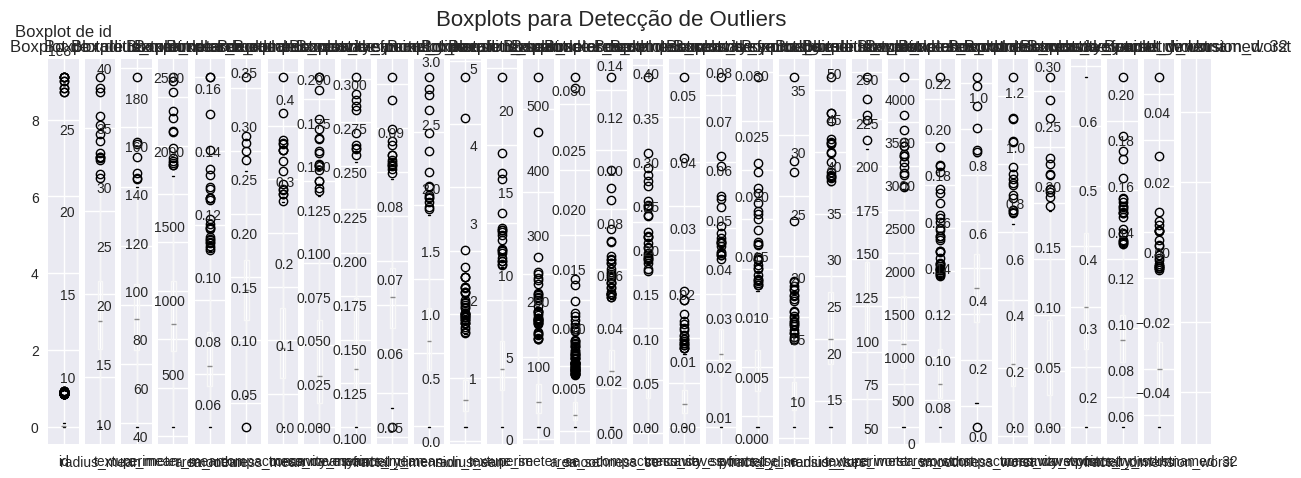

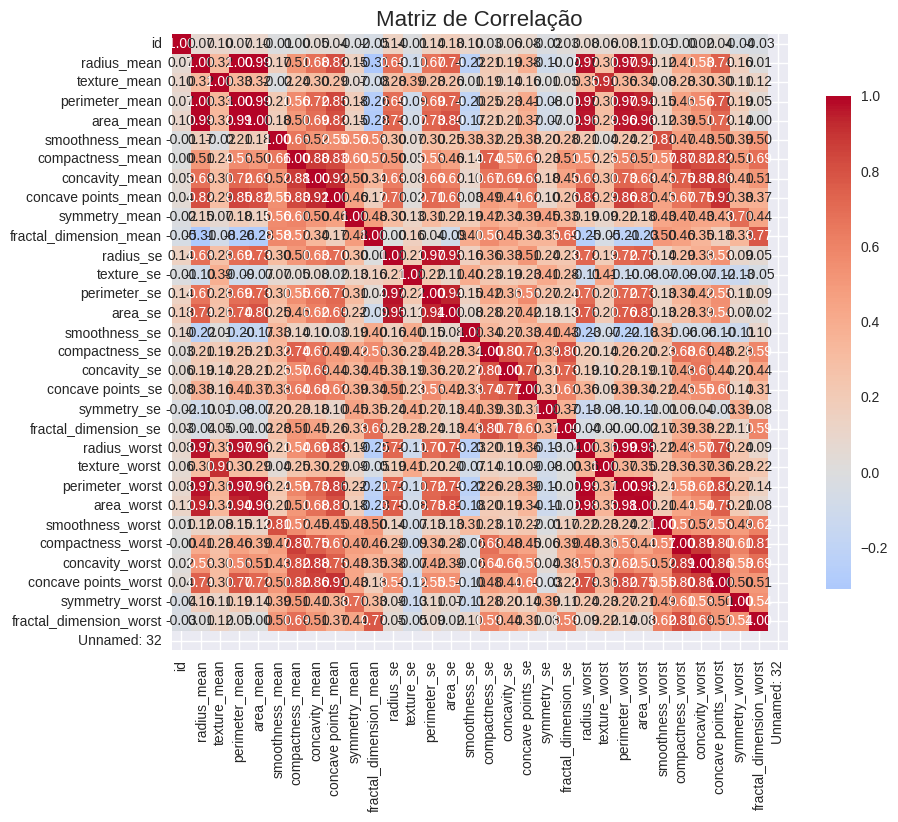

In [14]:
def visualizar_dataset(df):
    """
    Cria visualizações estatísticas do dataset
    """
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns
    
    # Configurar estilo
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # 1. Boxplots para detecção de outliers
    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
        if len(numeric_cols) == 1:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols):
            if idx < len(axes):
                df.boxplot(column=col, ax=axes[idx])
                axes[idx].set_title(f'Boxplot de {col}')
        
        plt.suptitle('Boxplots para Detecção de Outliers', fontsize=16)
        #plt.tight_layout()
        plt.show()
    
    # 2. Matriz de correlação (heatmap)
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr().round(2)
        sns.heatmap(correlation_matrix, 
                   annot=True, 
                   fmt='.2f', 
                   cmap='coolwarm', 
                   center=0,
                   square=True,
                   cbar_kws={"shrink": 0.8})
        plt.title('Matriz de Correlação', fontsize=16)
        #plt.tight_layout()
        plt.show()

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('cancer_mama.csv')

# Executar visualizações
visualizar_dataset(df)

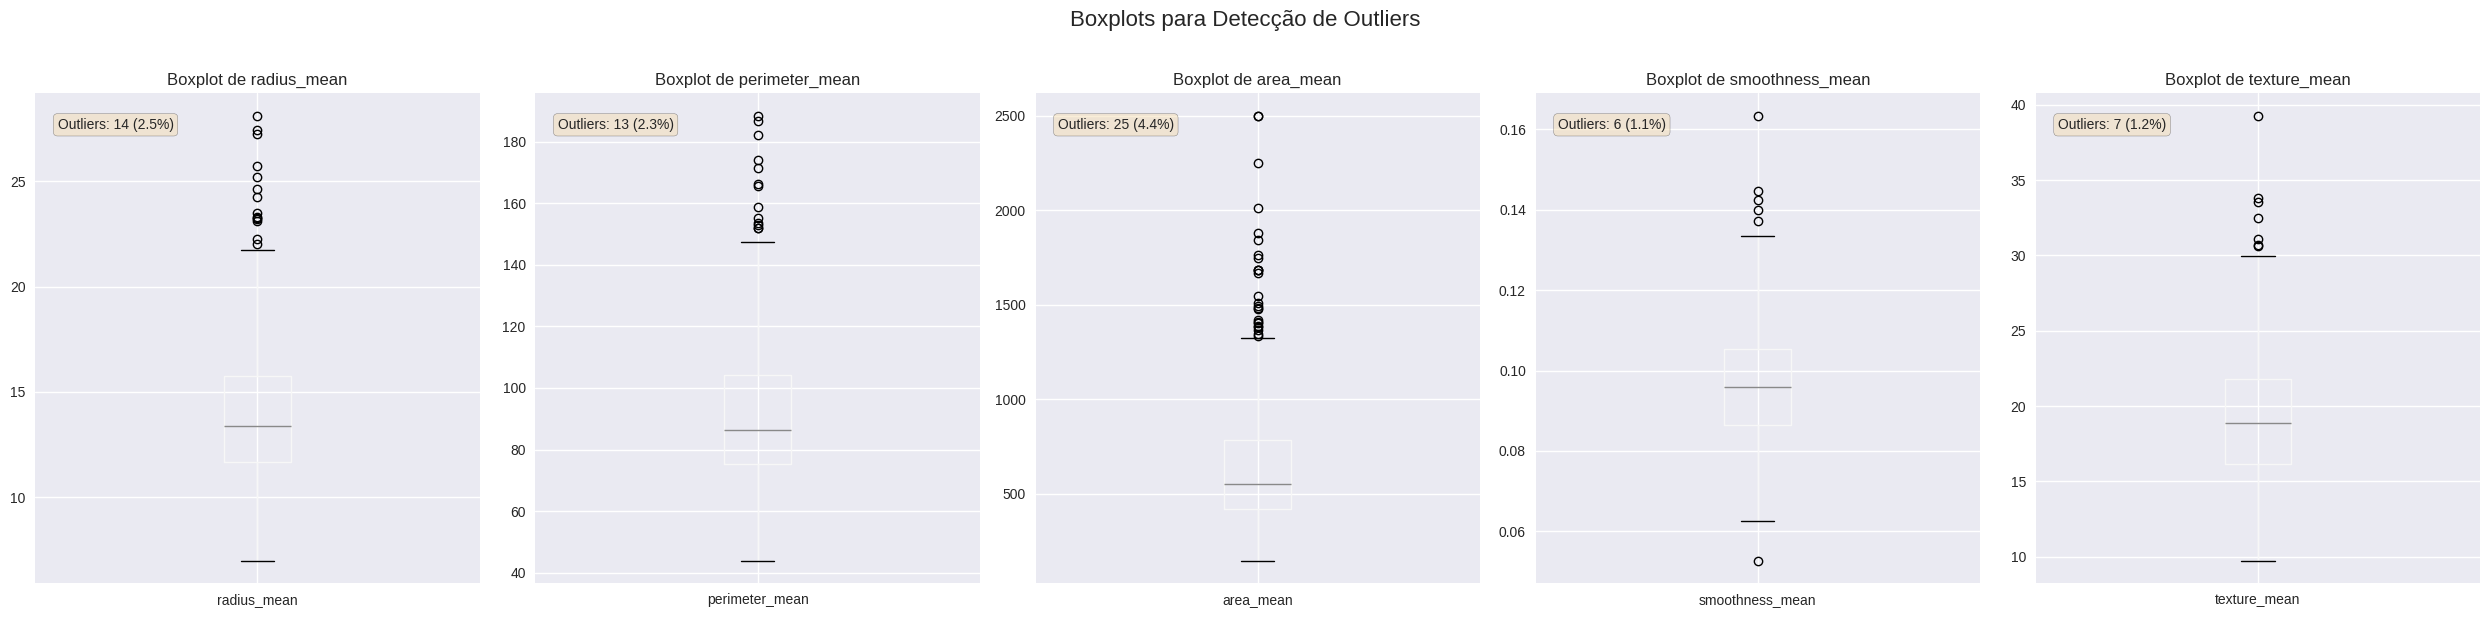

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'texture_mean']

In [15]:
def visualizar_outliers_especificos(df, columns):
    """
    Cria boxplots para detecção de outliers apenas nas colunas especificadas
    """
    # Filtrar apenas colunas que existem no DataFrame
    valid_columns = [col for col in columns if col in df.columns]
    
    if not valid_columns:
        print("Nenhuma das colunas especificadas foi encontrada no DataFrame")
        return
    
    # Configurar estilo
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # Criar boxplots
    n_cols = len(valid_columns)
    fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 6))
    
    if n_cols == 1:
        axes = [axes]
    
    for idx, col in enumerate(valid_columns):
        # Boxplot
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot de {col}')
        
        # Calcular estatísticas de outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        axes[idx].text(0.05, 0.95, 
                      f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                      transform=axes[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.suptitle('Boxplots para Detecção de Outliers', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Retornar estatísticas detalhadas
    return valid_columns

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('cancer_mama.csv')

# Especificar colunas desejadas
colunas_especificas = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'texture_mean']

# Executar visualizações específicas
visualizar_outliers_especificos(df, colunas_especificas)

In [16]:
#Verificação gráfica de preditoras mais influentes

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='radius_mean'>

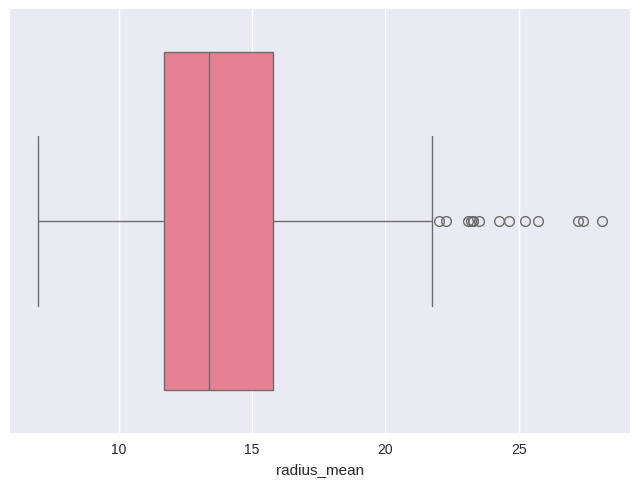

In [17]:
sb.boxplot(x=df_cancer["radius_mean"])

<Axes: xlabel='radius_mean', ylabel='Count'>

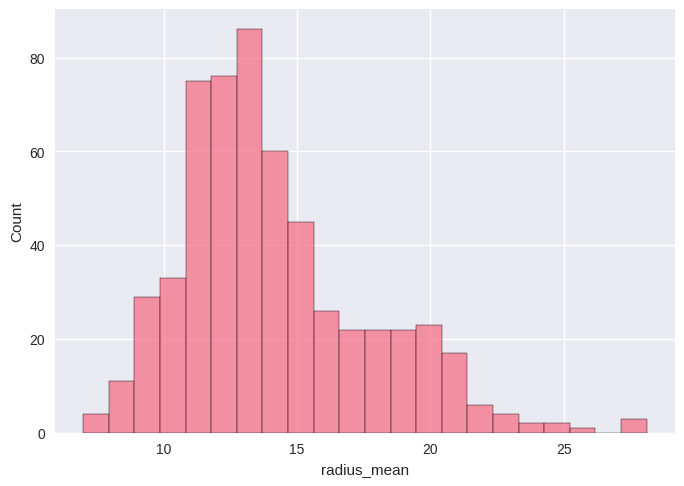

In [18]:
sb.histplot(data=df_cancer, x="radius_mean")

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='perimeter_mean'>

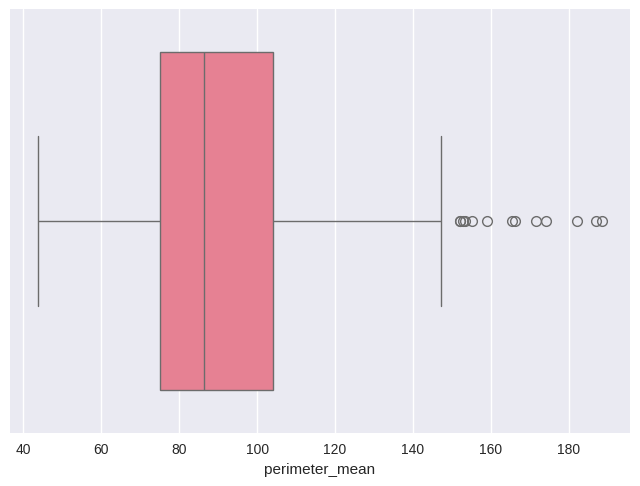

In [21]:
sb.boxplot(x=df_cancer["perimeter_mean"])

<Axes: xlabel='perimeter_mean', ylabel='Count'>

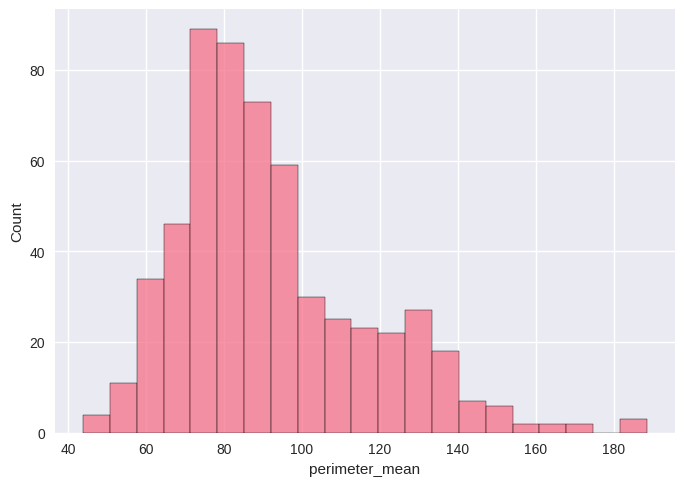

In [22]:
sb.histplot(data=df_cancer, x="perimeter_mean")

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='area_mean'>

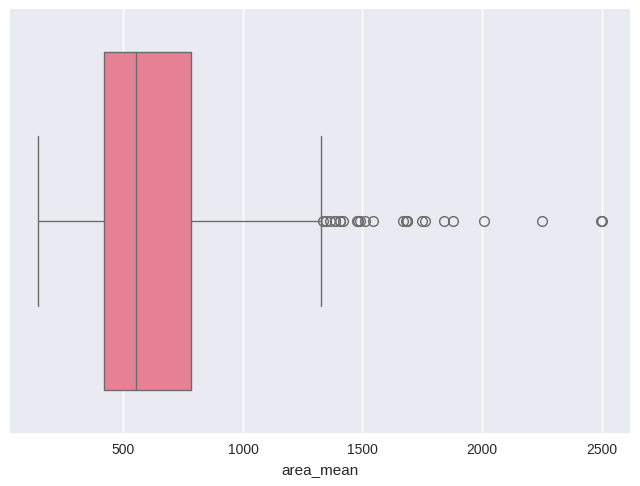

In [23]:
sb.boxplot(x=df_cancer["area_mean"])

<Axes: xlabel='area_mean', ylabel='Count'>

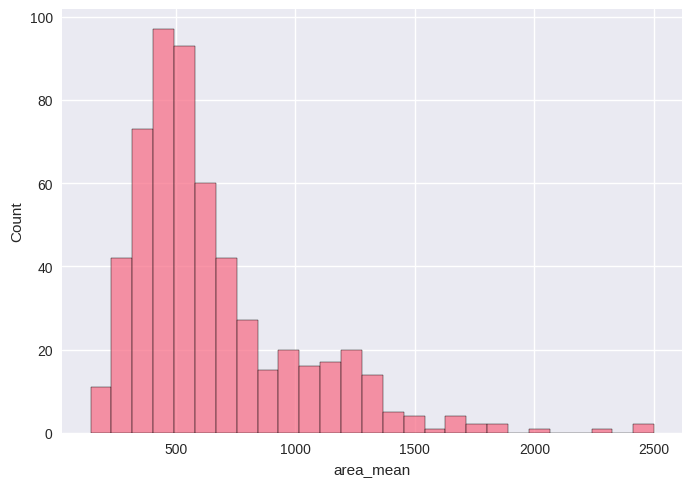

In [24]:
sb.histplot(data=df_cancer, x="area_mean")

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='texture_mean'>

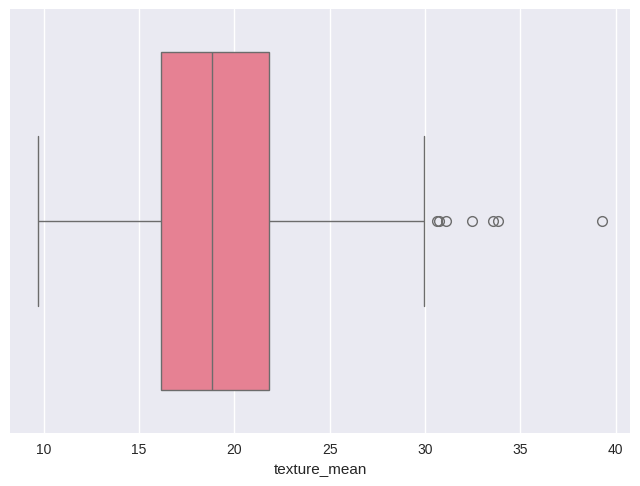

In [25]:
sb.boxplot(x=df_cancer["texture_mean"])

<Axes: xlabel='texture_mean', ylabel='Count'>

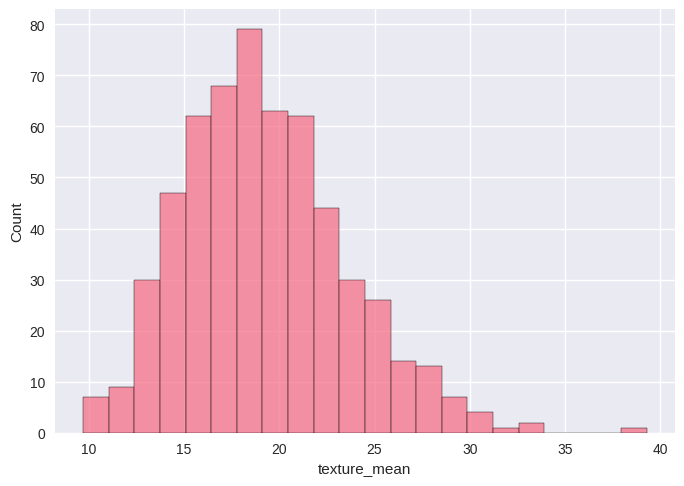

In [26]:
sb.histplot(data=df_cancer, x="texture_mean")

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='smoothness_mean'>

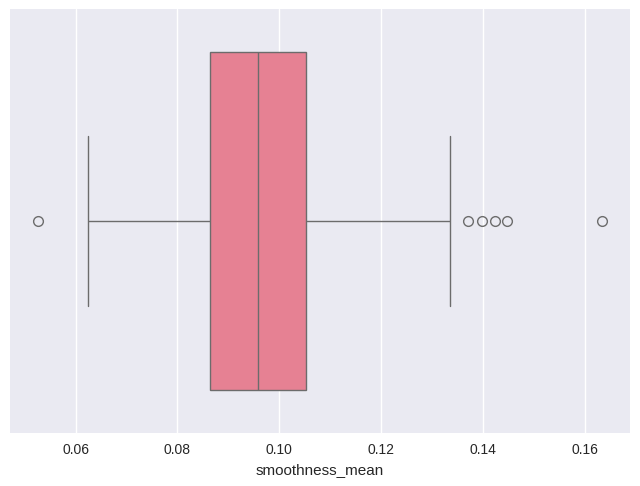

In [27]:
sb.boxplot(x=df_cancer["smoothness_mean"])

<Axes: xlabel='smoothness_mean', ylabel='Count'>

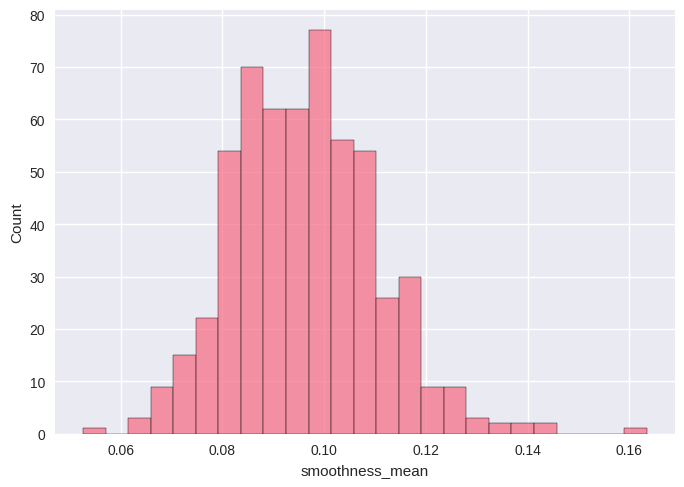

In [28]:
sb.histplot(data=df_cancer, x="smoothness_mean")

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When 

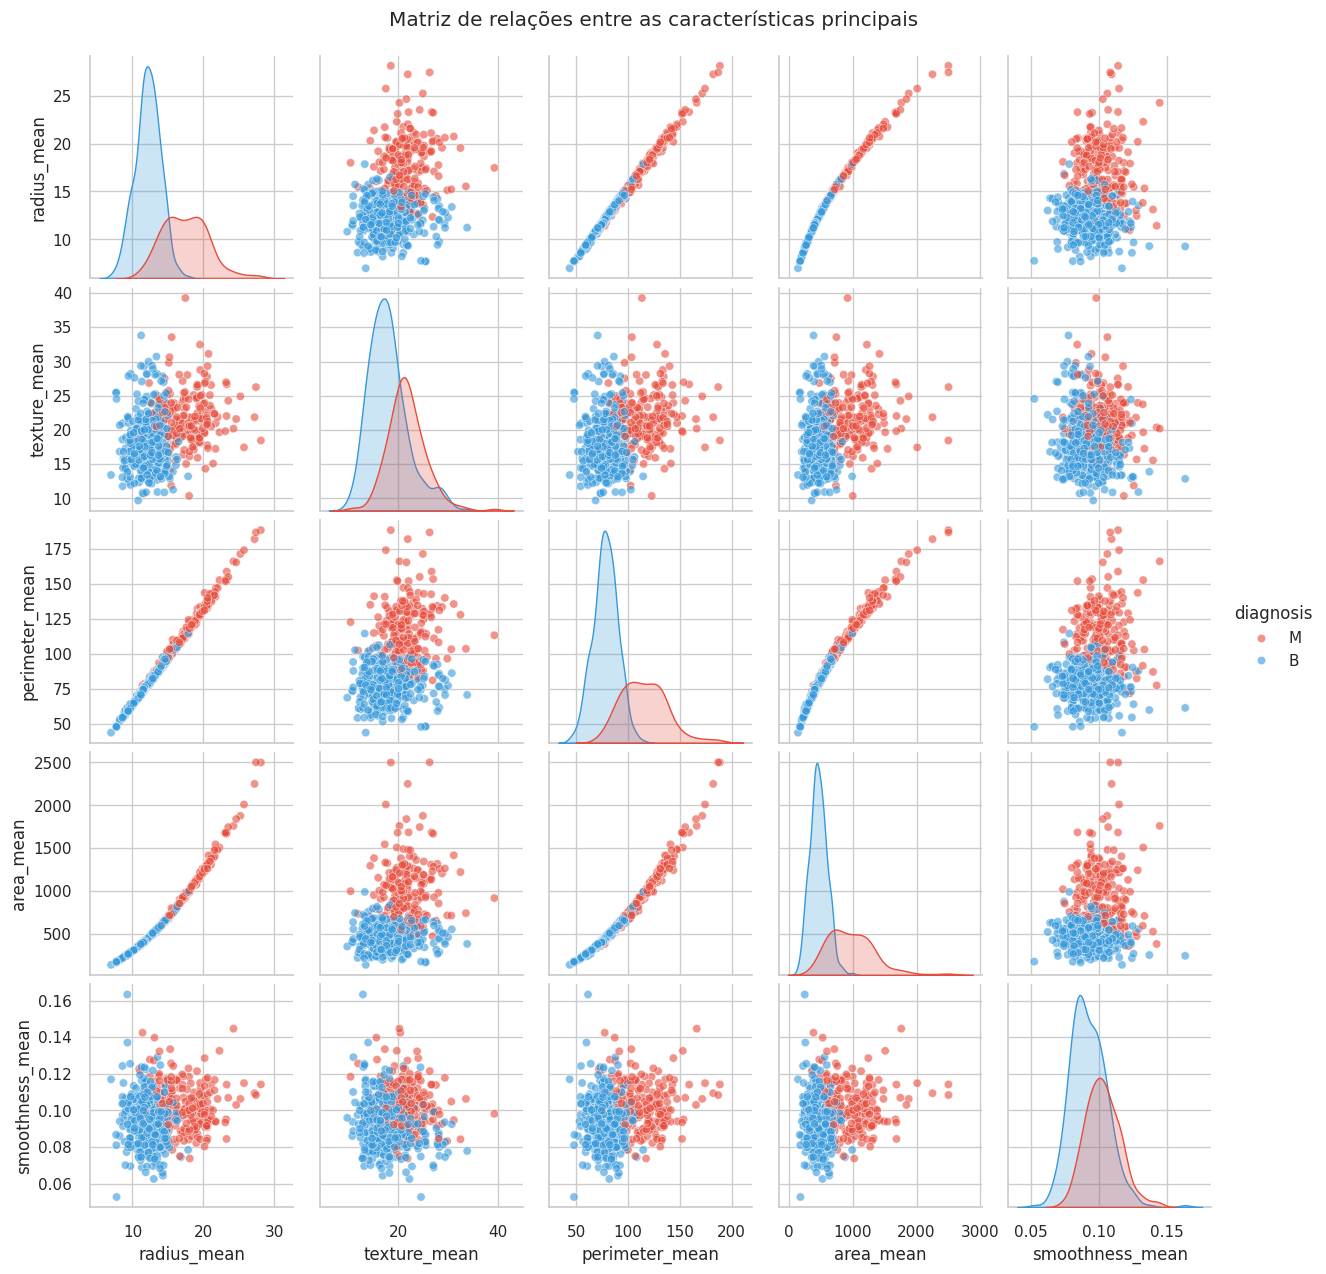

In [29]:
caracteristicas_principais = ['radius_mean', 'texture_mean', 'perimeter_mean', 
                       'area_mean', 'smoothness_mean']

sb.set_theme(style="whitegrid")
sb.pairplot(df_cancer, 
             vars=caracteristicas_principais,
             hue="diagnosis",
             palette={"M": "#e74c3c", "B": "#3498db"},  # Vermelho=Maligno, Azul=Benigno
             diag_kind='kde',  # Gráfico de densidade na diagonal
             plot_kws={'alpha': 0.6})  # Transparência nos pontos
plt.suptitle("Matriz de relações entre as características principais", y=1.02)
plt.show()

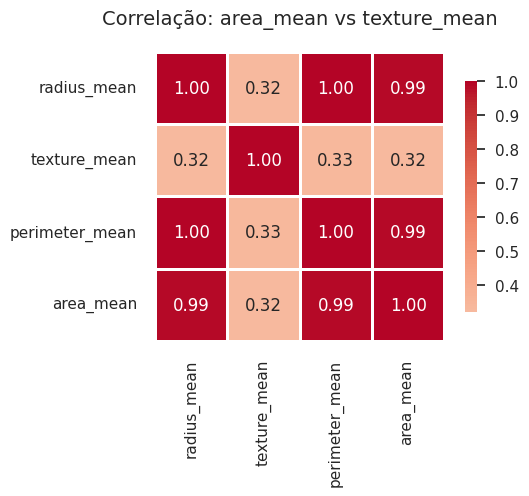

In [34]:
# Selecionadas apenas as colunas de interesse (em vermelho na Matriz de Correlação)
cols_para_correlacao = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

# Criar matriz de correlação apenas com essas colunas
plt.figure(figsize=(6, 5))
correlation_matrix = df[cols_para_correlacao].corr()
sns.heatmap(correlation_matrix, 
           annot=True, 
           fmt='.2f', 
           cmap='coolwarm', 
           center=0,
           square=True,
           cbar_kws={"shrink": 0.8},
           linewidths=1,
           linecolor='white')
plt.title('Correlação: area_mean vs texture_mean', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [35]:
#Verificação gráfica do Alvo Diagnóstico

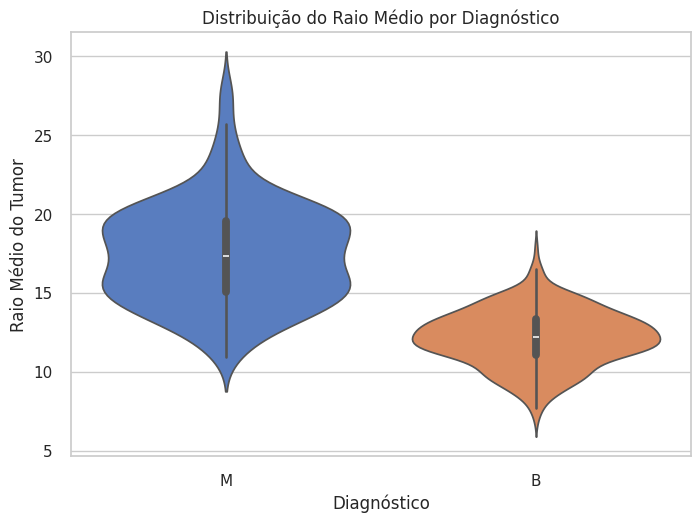

In [36]:
import matplotlib.pyplot as plt

sb.set_theme(style="whitegrid", palette="muted")
ax = sb.violinplot(data=df_cancer, 
                    x="diagnosis", 
                    y="radius_mean",
                    hue="diagnosis",
                    palette="muted",
                    legend=False)
ax.set(xlabel="Diagnóstico", ylabel="Raio Médio do Tumor")
plt.title("Distribuição do Raio Médio por Diagnóstico")
plt.show()

In [37]:
# Troca de 'M' para 0 e 'B' para 1
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

/tmp/ipykernel_155562/1179336306.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})


In [38]:
Total = len(df)
TotalMaligno = df[df["diagnosis"] == 0].diagnosis.count()
TotalBenigno = df[df["diagnosis"] == 1].diagnosis.count()

Percentual_Benigno = TotalBenigno / Total 

print("Total de dados: ", Total)
print("Total de diagnósticos Maligno: ", TotalMaligno)
print("Total de diagnósticos Benigno: ", TotalBenigno)
print("Percentual de diagnóstico Benigno na base: ", (round(Percentual_Benigno, 2)*100), "%")

Total de dados:  569
Total de diagnósticos Maligno:  212
Total de diagnósticos Benigno:  357
Percentual de diagnóstico Benigno na base:  63.0 %


In [39]:
import statsmodels.api as sm
import scipy
print(f"SciPy version: {scipy.__version__}")

SciPy version: 1.10.1


In [41]:
# Troca de 'M' para 0 e 'B' para 1
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

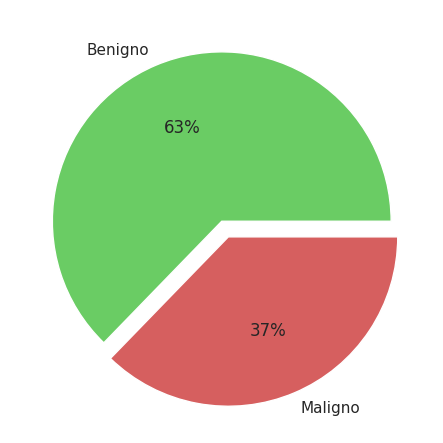

In [42]:
categororias = ["Benigno", "Maligno"]
plt.pie(df["diagnosis"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [44]:
df['Intercepto'] = 1

In [45]:
X = df[['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'texture_mean']]

In [46]:
Y = df ['diagnosis']

In [47]:
# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()

In [48]:
# Imprimir os resultados do modelo
print (modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:              diagnosis   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              473.3
Date:                Mon, 19 Jan 2026   Prob (F-statistic):                   3.93e-199
Time:                        21:00:44   Log-Likelihood:                         -205.93
No. Observations:                 569   AIC:                                      421.9
Df Residuals:                     564   BIC:                                      443.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [49]:
#O "R-squared (R2)" fornece informações sobre o ajuste geral do modelo.
#O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor
#Neste  caso, podemos concluir que o modelo explica 81% da variabilidade dos acertos de diagnóstico

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

In [51]:
# Utilização do método KNN 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score #avaliação
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings #remoção de avisos

In [53]:
#Criação do modelo de Machine Learming

In [54]:
#Separação da base de treino e teste

In [55]:
x = df[['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'texture_mean']]
y = df['diagnosis'] #alvo

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=7) #20% para teste e 80% de treino

In [57]:
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [58]:
x_train_escalonado = scaler.transform(x_train) #treino
x_test_escalonado = scaler.transform(x_test)   #teste

In [59]:
x_train

radius_mean  perimeter_mean  area_mean  smoothness_mean  texture_mean
285        12.58           79.83      489.0          0.08393         18.40
535        20.55          137.80     1308.0          0.10460         20.86
521        24.63          165.50     1841.0          0.10300         21.60
339        23.51          155.10     1747.0          0.10690         24.27
429        12.72           80.98      501.3          0.07896         17.67
..           ...             ...        ...              ...           ...
508        16.30          104.70      819.8          0.09427         15.70
203        13.81           91.56      597.8          0.13230         23.75
297        11.76           75.00      431.1          0.09968         18.14
390        10.26           65.75      321.6          0.09996         12.22
125        13.85           88.44      588.7          0.08785         17.21

[455 rows x 5 columns]

In [60]:
x_train_escalonado

array([[0.27393708, 0.25183425, 0.14655355, 0.21231044, 0.29387893],
       [0.66387788, 0.65690727, 0.49395546, 0.41718704, 0.37707136],
       [0.86349626, 0.85046468, 0.72004242, 0.40132818, 0.40209672],
       ...,
       [0.2338177 , 0.21808399, 0.12199364, 0.36842105, 0.28508624],
       [0.16042859, 0.1534484 , 0.07554613, 0.37119635, 0.08488333],
       [0.33607319, 0.31199776, 0.18884411, 0.25116463, 0.25363544]])

In [61]:
#Configuração do modelo
error = []

# Assuming you're using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Use the scaled data for both training and prediction
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)  # Use scaled test data
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro médio')

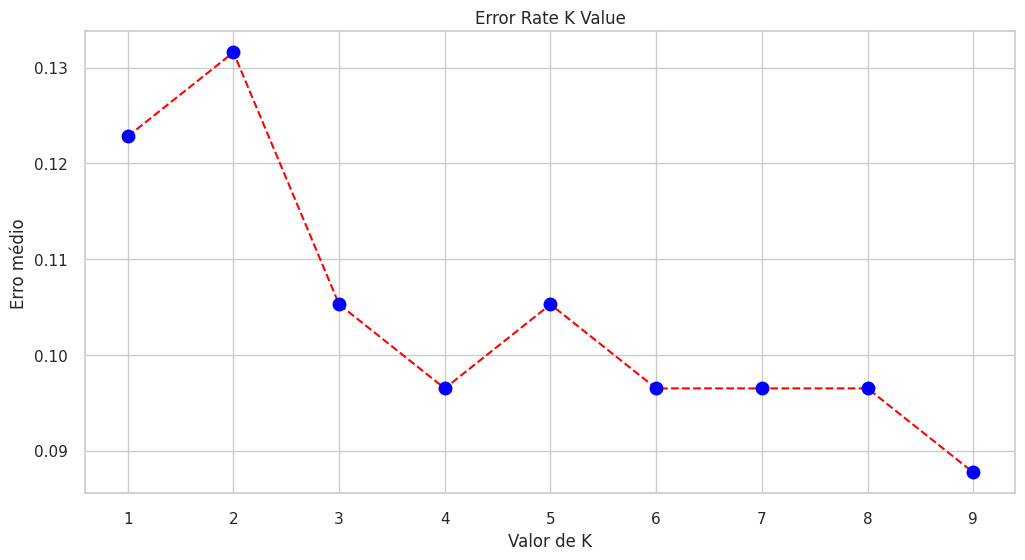

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

/tmp/ipykernel_155562/3976365573.py:35: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


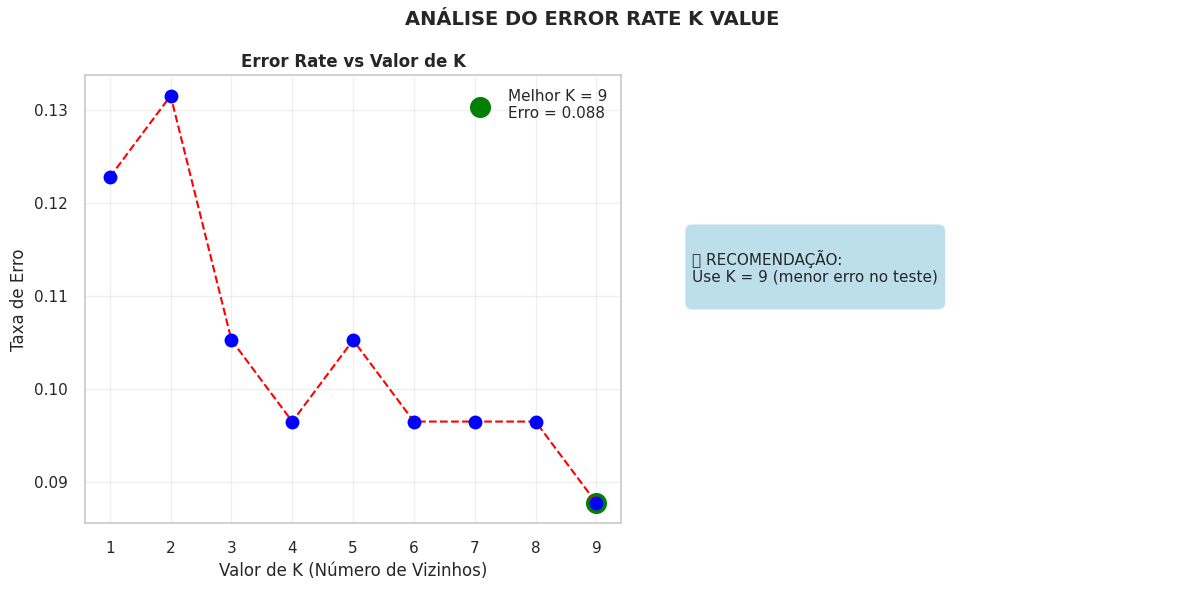

In [63]:
# Visualização do Error Rate
plt.figure(figsize=(12, 6))

# Gráfico do Error Rate
plt.subplot(1, 2, 1)
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs Valor de K', fontweight='bold')
plt.xlabel('Valor de K (Número de Vizinhos)')
plt.ylabel('Taxa de Erro')
plt.grid(True, alpha=0.3)

# Encontrar K com menor erro
best_k_idx = np.argmin(error)
best_k_value = best_k_idx + 1
best_error = error[best_k_idx]

plt.scatter(best_k_value, best_error, color='green', s=200, 
           label=f'Melhor K = {best_k_value}\nErro = {best_error:.3f}')
plt.legend()

# Explicação visual
plt.subplot(1, 2, 2)
plt.axis('off')

explicacao = f"""
🎯 RECOMENDAÇÃO:
Use K = {best_k_value} (menor erro no teste)
"""

plt.text(0.1, 0.5, explicacao, fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.suptitle('ANÁLISE DO ERROR RATE K VALUE', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [64]:
#Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

In [65]:
#Treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [66]:
y_predito = modelo_classificador.predict(x_test_escalonado) #predições

In [67]:
# Acurácia do modelo
print(accuracy_score(y_test, y_predito))

0.8947368421052632


In [68]:
#Conclusão KNN

In [69]:
# Acurácia de 89.47%, esta é muito boa para um modelo de classificação 
#e Supera a baseline, se considerarmos um classificador aleatório
#ou um classificador que sempre prevê a classe majoritária, 89.4% é, 
#significativamente, melhor

In [70]:
# Avaliação do Modelo KNN utilizando técnicas conhecidas

In [73]:
# Escolher o melhor K baseado no gráfico Error Rate
# Supondo que o menor erro foi em K=5 (ajuste conforme seu gráfico)
best_k = 9  # Substitua pelo K que teve menor erro no seu gráfico# Treinar modelo com melhor K

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)

# Fazer previsões
y_pred = knn_best.predict(x_test_scaled)

# AGORA SIM calcular todas as métricas
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Supondo que 'M' é Maligno e 'B' é Benigno
# Verifique seus labels:
print("Classes únicas em y_test:", np.unique(y_test))

# Calcular métricas (ajuste 'pos_label' conforme seus dados)
accuracy = accuracy_score(y_test, y_pred)

# Para recall, precisão e F1, precisamos especificar qual classe é "positiva"
# Em diagnóstico de câncer, geralmente 'Maligno' é a classe positiva
if 1 in y_test.values:
    pos_label = 1  # Se for numérico
else:
    pos_label = y_test.iloc[0]  # Primeiro valor como fallback

recall = recall_score(y_test, y_pred, pos_label=pos_label)
precision = precision_score(y_test, y_pred, pos_label=pos_label)
f1 = f1_score(y_test, y_pred, pos_label=pos_label)


print("MÉTRICAS CALCULADAS:")
print(f"Acurácia:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"Precisão:  {precision:.4f} ({precision*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

Classes únicas em y_test: [0 1]
MÉTRICAS CALCULADAS:
Acurácia:  0.9123 (91.23%)
Recall:    0.9444 (94.44%)
Precisão:  0.9189 (91.89%)
F1-Score:  0.9315 (93.15%)


In [ ]:
#Modelo de árvores

In [74]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [75]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth = 2)

In [76]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [77]:
DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)

In [78]:
y_predito = dt.predict(x_test) 

[Text(0.5, 0.8333333333333334, 'x[2] <= 695.7\nentropy = 0.953\nsamples = 455\nvalue = [170, 285]'),
 Text(0.25, 0.5, 'x[4] <= 19.61\nentropy = 0.574\nsamples = 323\nvalue = [44, 279]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.268\nsamples = 219\nvalue = [10, 209]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.912\nsamples = 104\nvalue = [34, 70]'),
 Text(0.75, 0.5, 'x[4] <= 15.82\nentropy = 0.267\nsamples = 132\nvalue = [126, 6]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.068\nsamples = 123\nvalue = [122, 1]')]

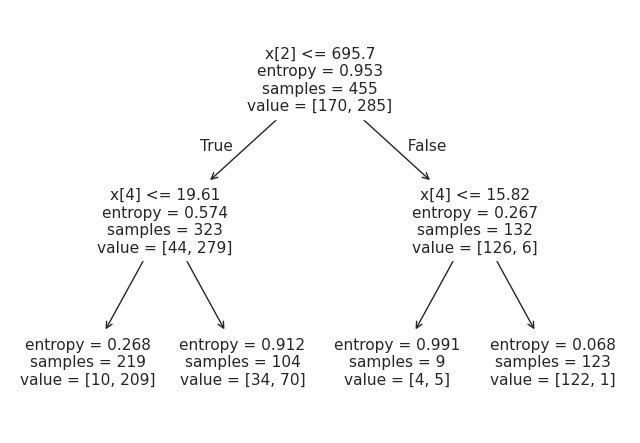

In [79]:
tree.plot_tree(dt)

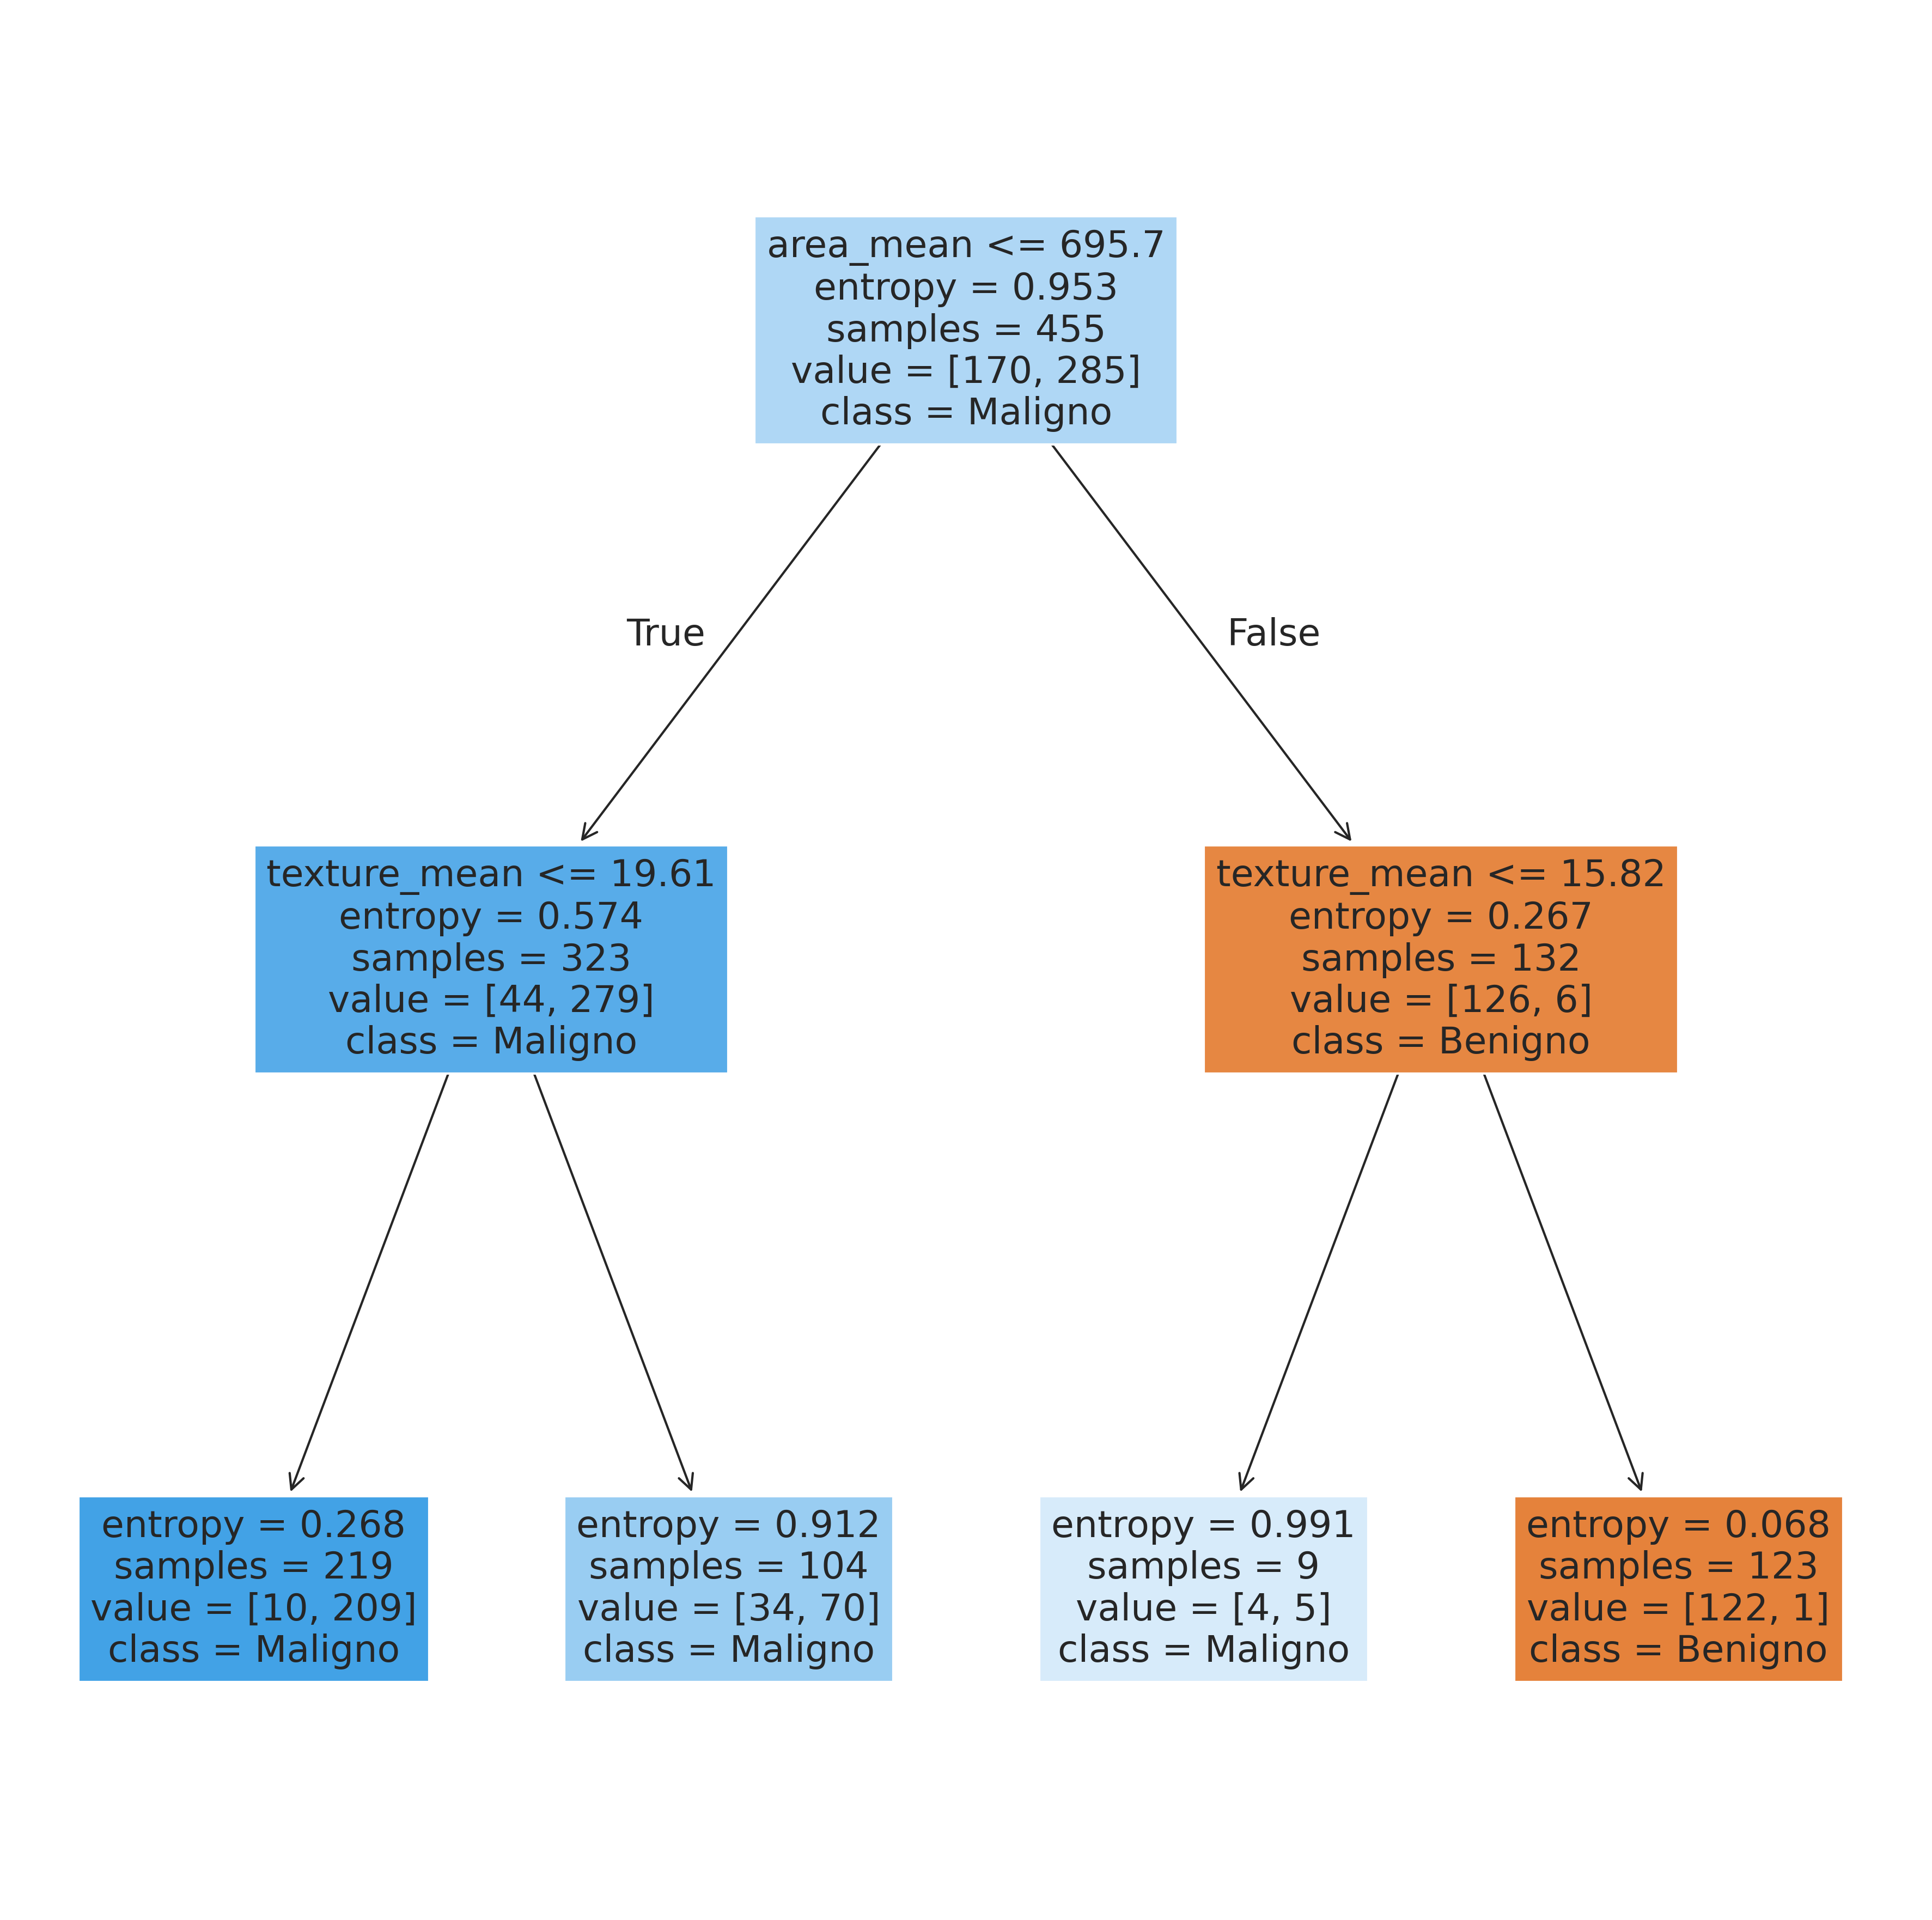

In [81]:
class_names = ['Benigno', 'Maligno']
label_names = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'texture_mean']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(dt,
               feature_names = label_names, 
               class_names=class_names,
               filled = True)
fig.savefig('imagename.png')

In [84]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.9035087719298246


In [85]:
#Random Forest
#Ou Floresta Aleatória, é  algoritmo que combina múltiplas Árvores de Decisão (Decision Trees) para criar um modelo preditivo
#mais robusto e preciso, usando uma "votação" ou média de previsões de várias árvores para classificação ou regressão, 
#sendo mais eficaz que uma única árvore ao reduzir o sobreajuste (overfitting). 

In [86]:
rf = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7) 
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [87]:
RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [88]:
estimator = rf.estimators_
y_predito_random_forest = rf.predict(x_test) 

In [89]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métrica de desempenho.

0.9122807017543859


In [90]:
class_names = ['Benigno', 'Maligno']
label_names = ['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'texture_mean']

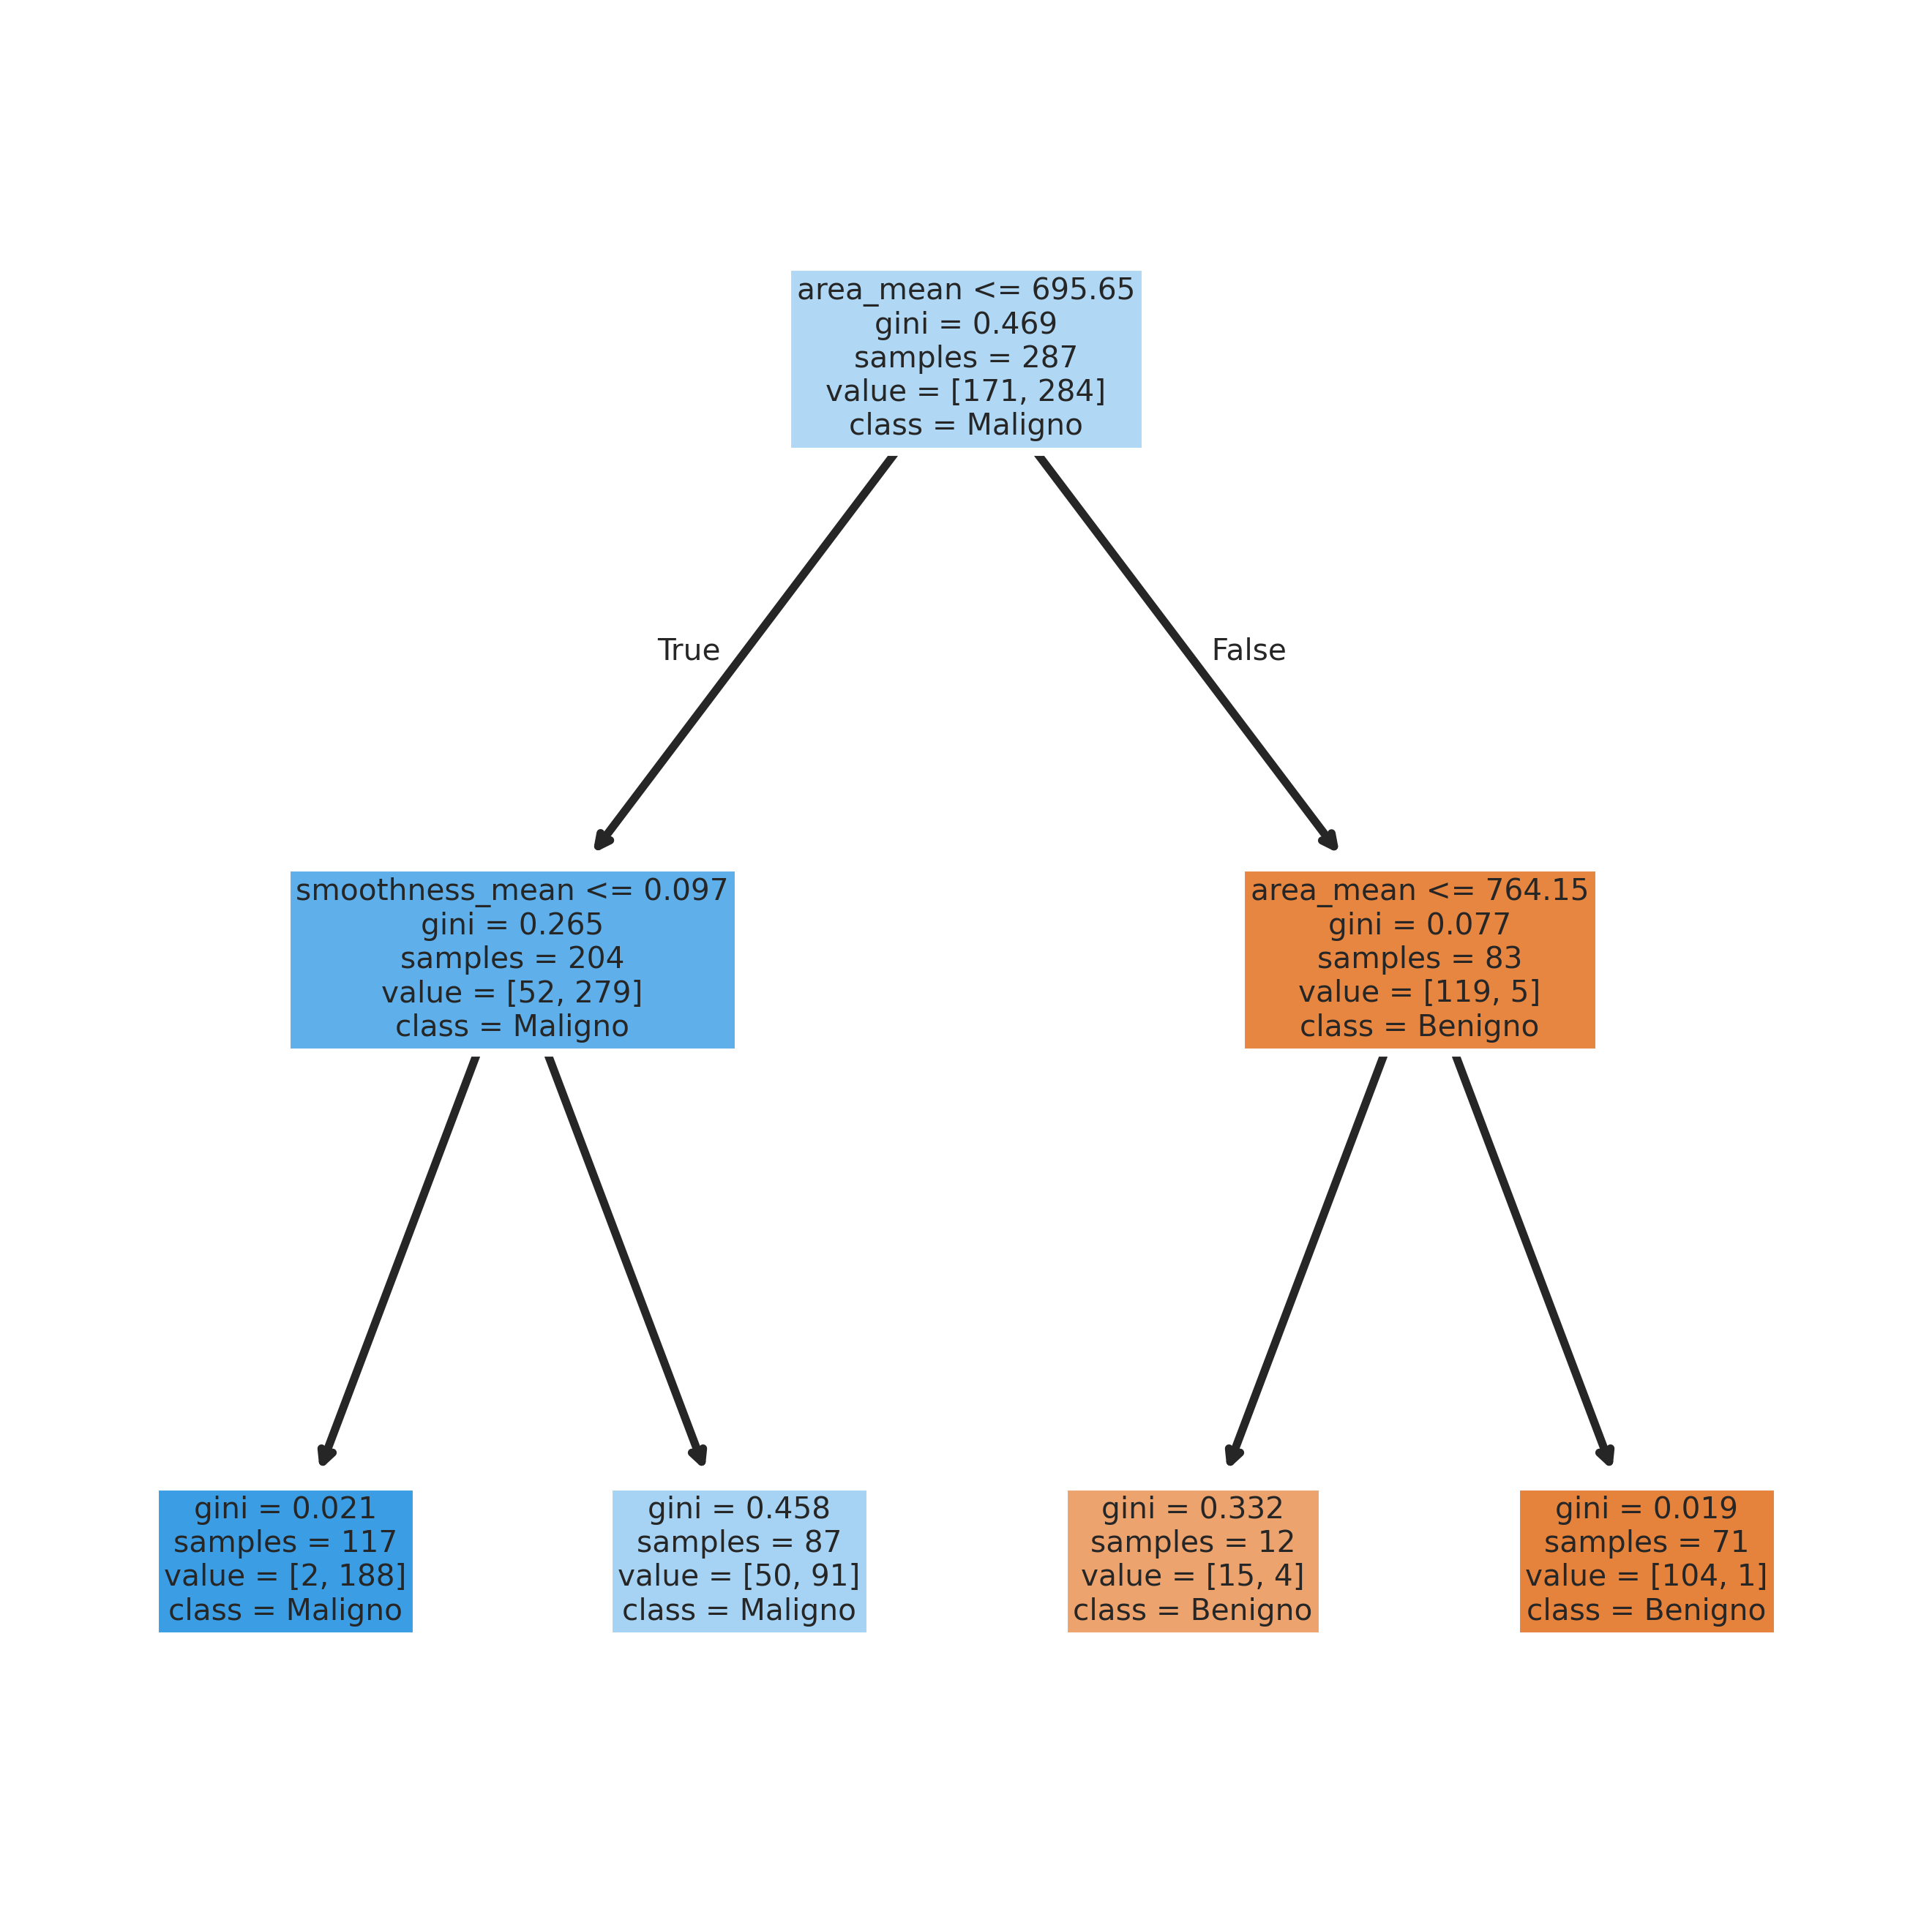

In [91]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = label_names, 
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

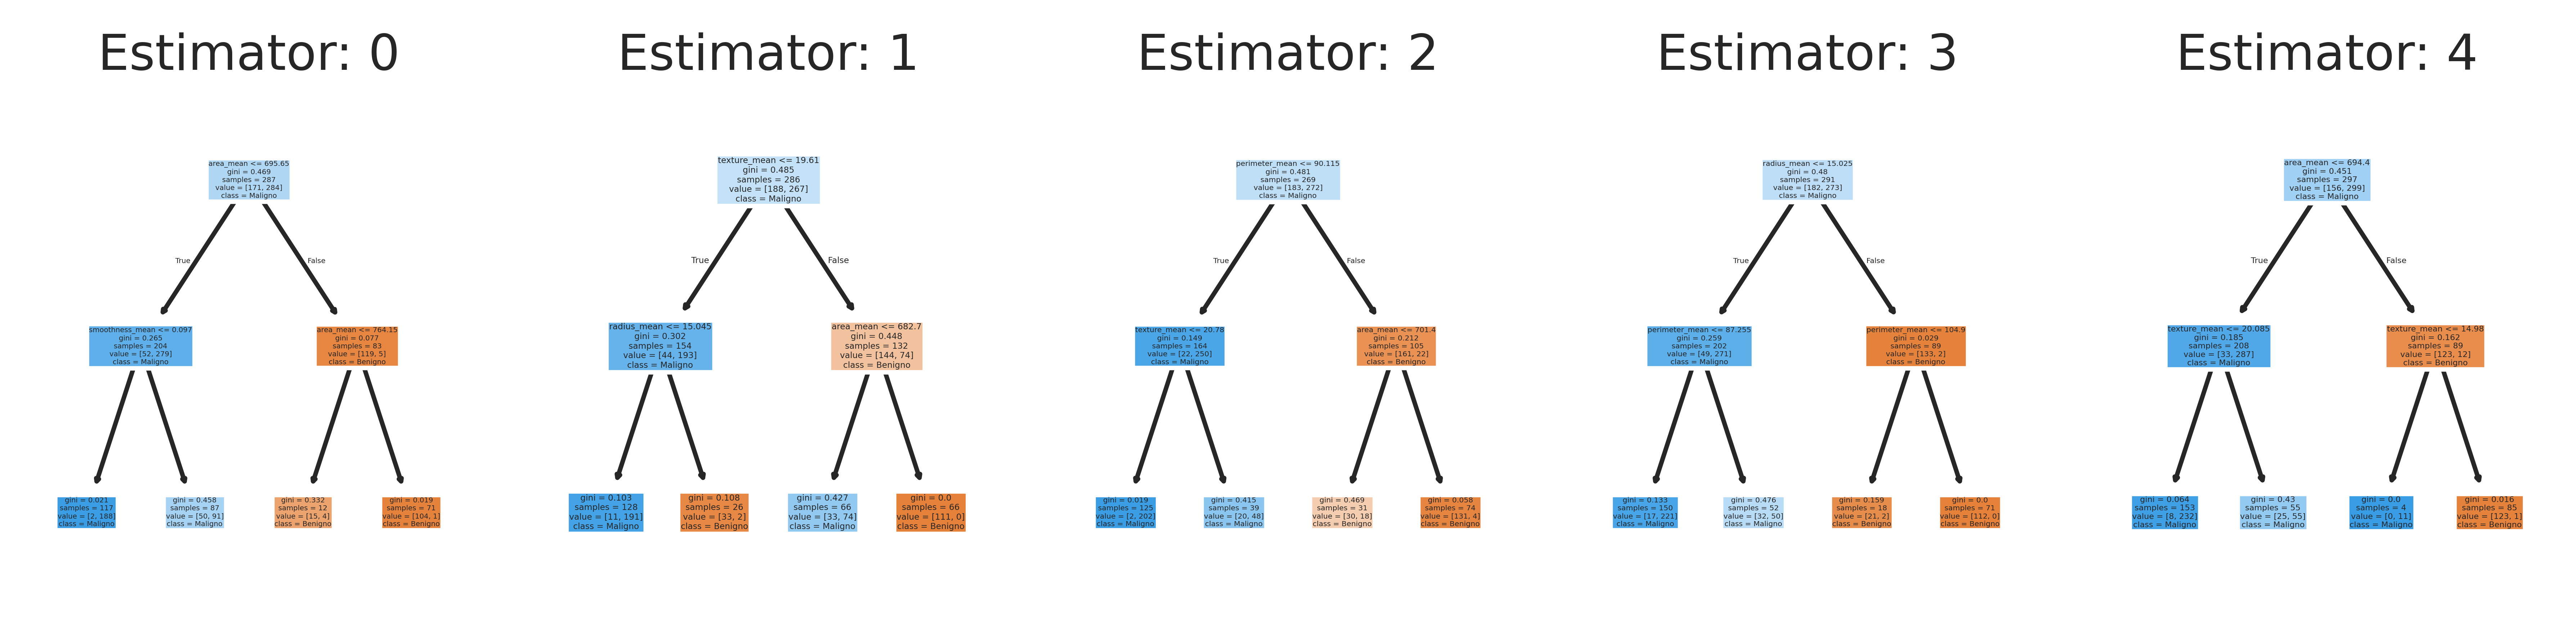

In [92]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = label_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [93]:
print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.8923076923076924
0.9122807017543859


In [94]:
# Explicação: o Score fornece visão da precisão média da floresta aleatória nos dados fornecidos

In [95]:
# Transformado para percentual
treino_percent = rf.score(x_train, y_train) * 100
teste_percent = rf.score(x_test, y_test) * 100

print(f"Treino: {treino_percent:.2f}%")
print(f"Teste:  {teste_percent:.2f}%")

Treino: 89.23%
Teste:  91.23%


Avaliação do Modelo Random Forest

MÉTRICAS DE PERFORMANCE
+-----------+-----------------+--------------+-----------------------------------+
|  Métrica  |   Valor Decimal |  Percentual  |           Interpretação           |
+===========+=================+==============+===================================+
| Acurácia  |          0.9123 |    91.23%    |          Acertos totais           |
+-----------+-----------------+--------------+-----------------------------------+
| Precisão  |          0.9119 |    91.19%    | Acertos entre positivos previstos |
+-----------+-----------------+--------------+-----------------------------------+
|  Recall   |          0.9123 |    91.23%    |      Casos reais detectados       |
+-----------+-----------------+--------------+-----------------------------------+
| F1-Score  |          0.9118 |    91.18%    |        Média harmônica P/R        |
+-----------+-----------------+--------------+-----------------------------------+
|  AUC-ROC  |          0.954

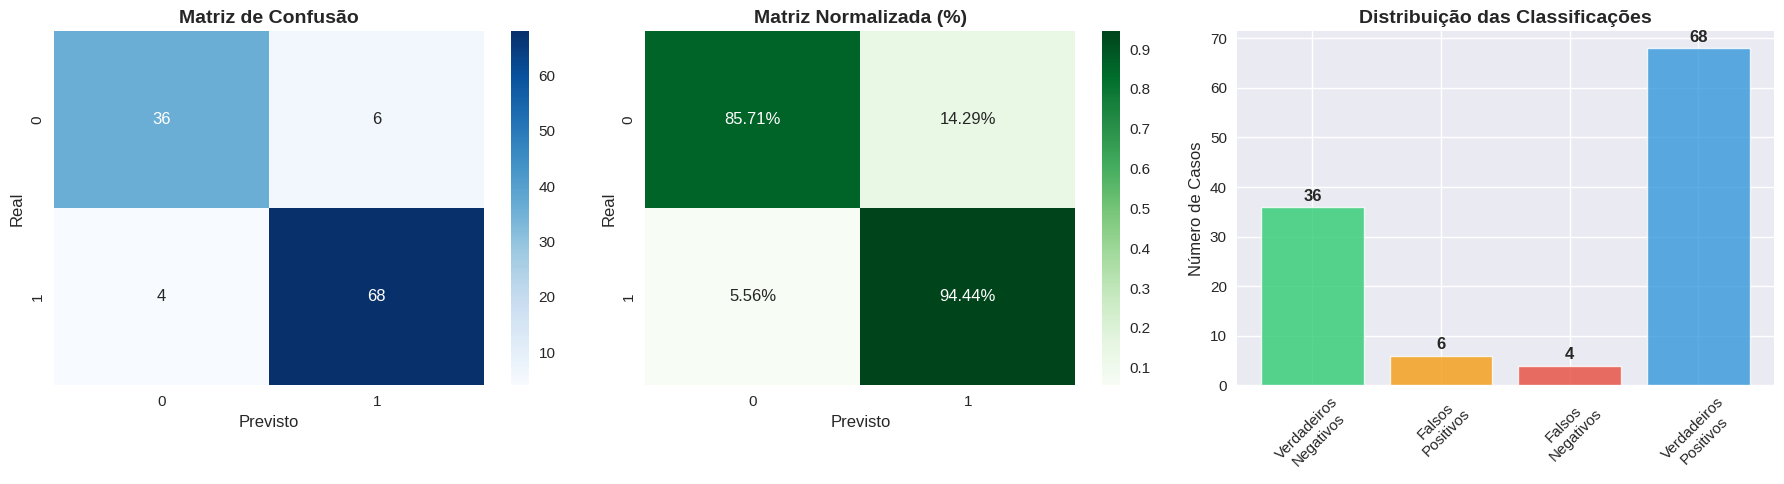


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO

              precision    recall  f1-score   support

    Classe 0       0.90      0.86      0.88        42
    Classe 1       0.92      0.94      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


ANÁLISE DA CURVA ROC


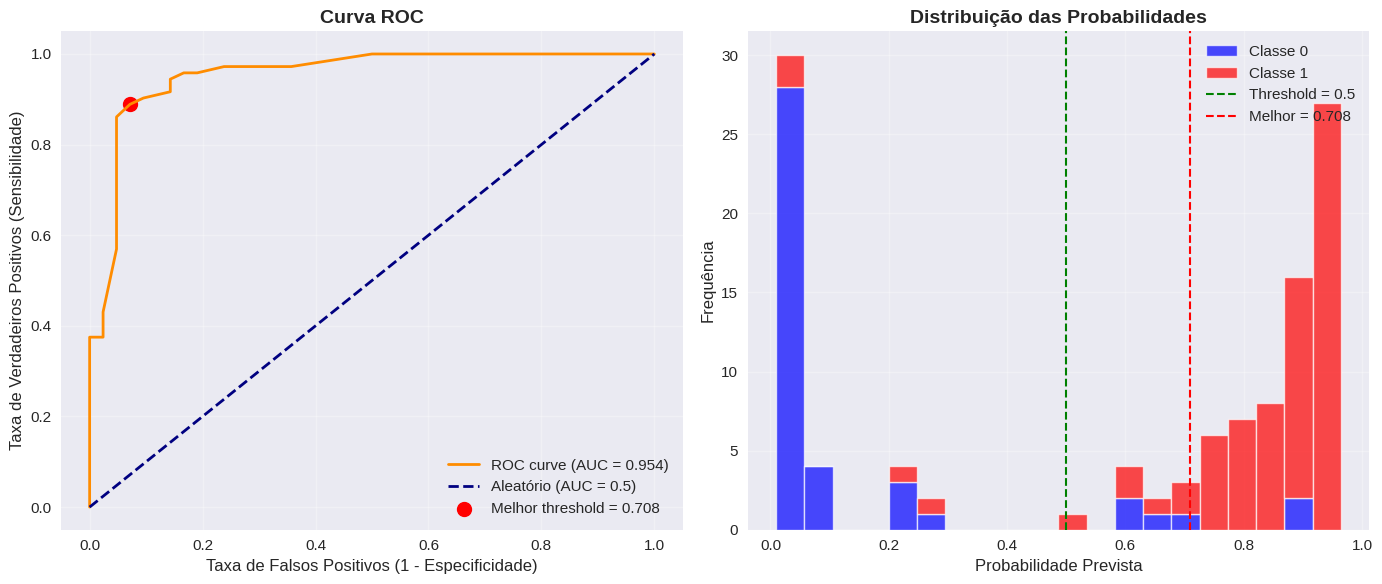


📈 Área sob a curva ROC (AUC): 0.9544
   • < 0.6: Discriminação ruim
   • 0.6-0.7: Discriminação razoável
   • 0.7-0.8: Discriminação boa
   • 0.8-0.9: Discriminação muito boa
   • > 0.9: Discriminação excelente

🎯 Melhor threshold encontrado: 0.708
   (Ponto mais próximo do canto superior esquerdo)

JUSTIFICATIVA DA ESCOLHA DAS MÉTRICAS

📊 **CONTEXTO DO PROBLEMA:**

Considerando que estamos trabalhando com diagnóstico médico (câncer de mama), 
a escolha das métricas deve refletir os custos assimétricos dos diferentes 
tipos de erro:

1. 🚨 **FALSOS NEGATIVOS (FN)**: 
   • Paciente com câncer classificado como saudável
   • CONSEQUÊNCIA GRAVE: Diagnóstico tardio, tratamento atrasado
   • CUSTO: Potencial perda de vida

2. ⚠️ **FALSOS POSITIVOS (FP)**:
   • Paciente saudável classificado como com câncer
   • CONSEQUÊNCIA: Ansiedade, exames adicionais, custos extras
   • CUSTO: Financeiro e psicológico, mas menos grave

🎯 **HIERARQUIA DE IMPORTÂNCIA DAS MÉTRICAS:**

1. 🥇 **SENSIBILIDADE (

/tmp/ipykernel_155562/549071962.py:417: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_155562/549071962.py:417: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


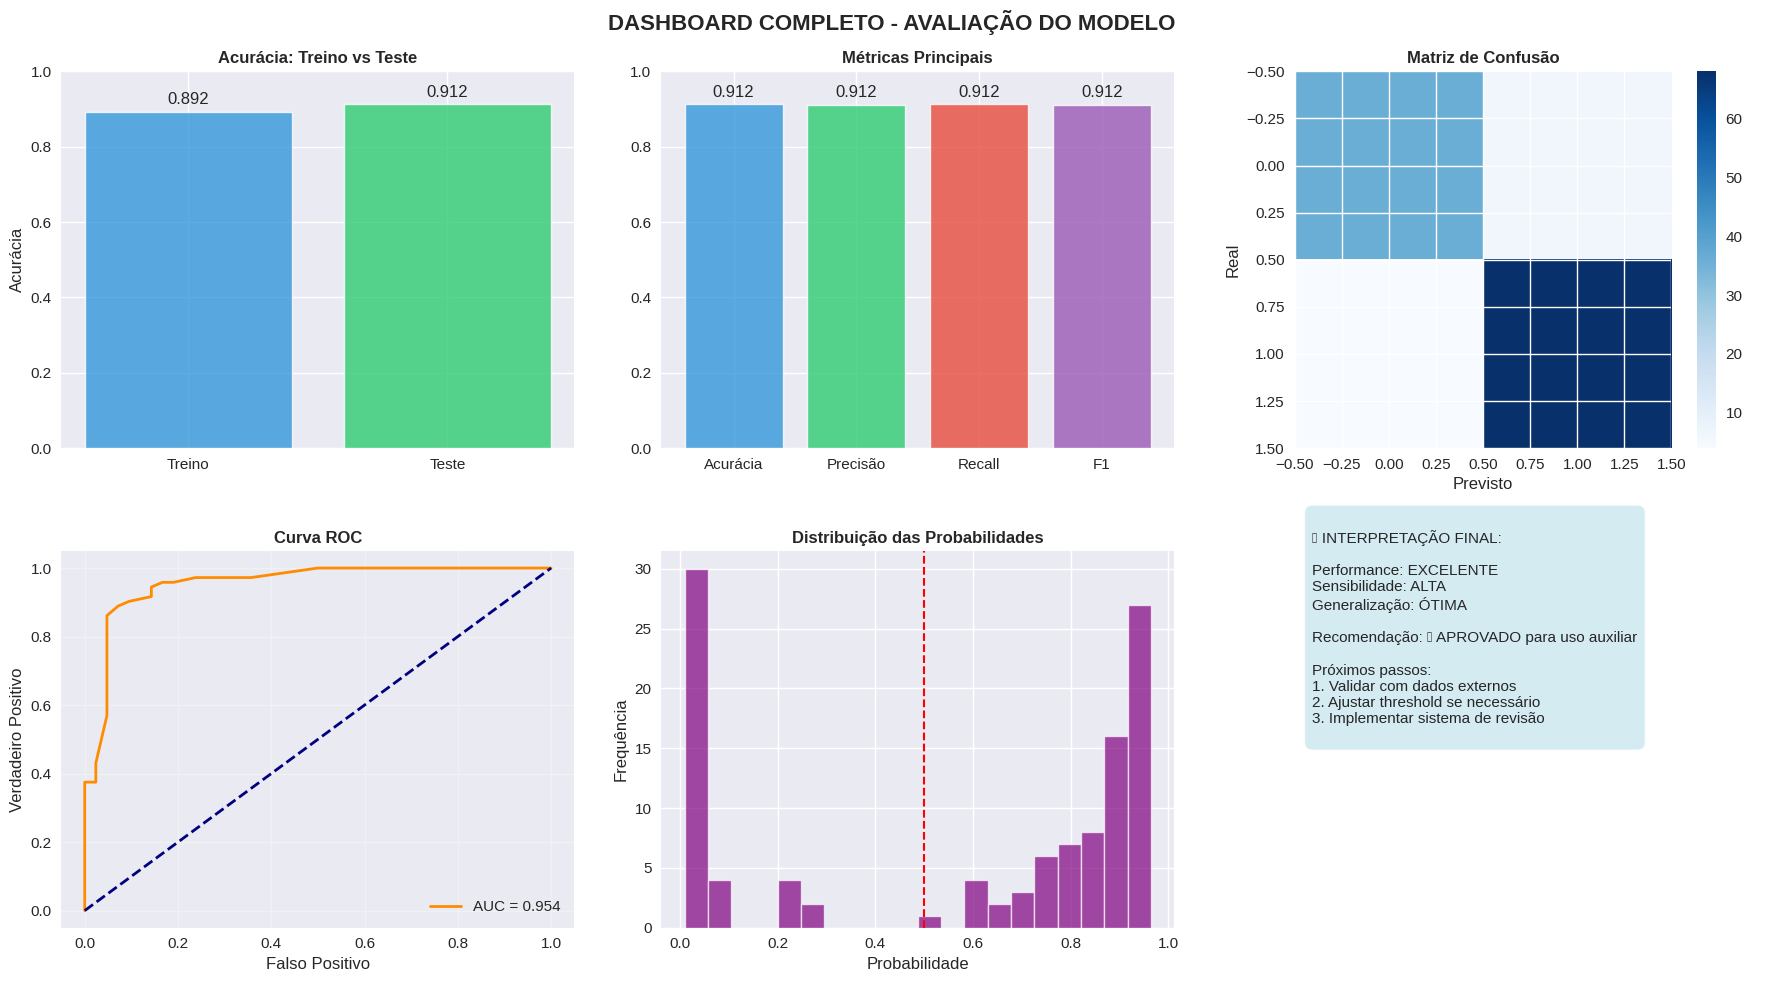


✅ AVALIAÇÃO COMPLETA CONCLUÍDA


In [97]:
# Avaliação do Modelo
# PRIMEIRO: Importar todas as bibliotecas necessárias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from tabulate import tabulate

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# AVALIAÇÃO DO MODELO COM DADOS DE TESTE

print("Avaliação do Modelo Random Forest")

# previsões
y_pred = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:, 1] if hasattr(rf, 'predict_proba') else None

# métricas
try:
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # problema é binário -> métricas específicas
    if len(np.unique(y_test)) == 2:
        precision_0 = precision_score(y_test, y_pred, pos_label=0, zero_division=0)
        recall_0 = recall_score(y_test, y_pred, pos_label=0, zero_division=0)
        precision_1 = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        recall_1 = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        
        # AUC-ROC - Áreas embaixo da curva, utilizada em modelos de classificação binária - ROC ROC (Receiver Operating Characteristic) é a curva que mostra o desempenho
        # ROC Eixo X: Taxa de Falsos Positivos (FPR = 1 - Especificidade)
        # ROC Eixo Y: Taxa de Verdadeiros Positivos (TPR = Sensibilidade)

        if y_pred_proba is not None:
            auc_roc = roc_auc_score(y_test, y_pred_proba)
        else:
            auc_roc = roc_auc_score(y_test, y_pred)
except Exception as e:
    print(f"Erro ao calcular métricas: {e}")
    # Valores padrão
    accuracy = rf.score(X_test, y_test)
    precision = accuracy
    recall = accuracy
    f1 = accuracy

# Resultado em tabela
print("\n" + "="*80)
print("MÉTRICAS DE PERFORMANCE")
print("="*80)

# Tabela principal
tabela_principal = [
    ["Métrica", "Valor Decimal", "Percentual", "Interpretação"],
    ["Acurácia", f"{accuracy:.4f}", f"{accuracy*100:.2f}%", "Acertos totais"],
    ["Precisão", f"{precision:.4f}", f"{precision*100:.2f}%", "Acertos entre positivos previstos"],
    ["Recall", f"{recall:.4f}", f"{recall*100:.2f}%", "Casos reais detectados"],
    ["F1-Score", f"{f1:.4f}", f"{f1*100:.2f}%", "Média harmônica P/R"]
]

if 'auc_roc' in locals():
    tabela_principal.append(["AUC-ROC", f"{auc_roc:.4f}", f"{auc_roc*100:.2f}%", "Capacidade discriminatória"])

print(tabulate(tabela_principal, headers="firstrow", tablefmt="grid", stralign="center"))

# 1.4 Comparação Treino vs Teste
print("\n" + "="*80)
print("COMPARAÇÃO TREINO vs TESTE")
print("="*80)

train_score = rf.score(x_train, y_train)
test_score = rf.score(x_test, y_test)

tabela_comparacao = [
    ["Dataset", "Acurácia", "Diferença", "Interpretação"],
    ["Treino", f"{train_score:.4f} ({train_score*100:.2f}%)", "-", "Aprendizado do modelo"],
    ["Teste", f"{test_score:.4f} ({test_score*100:.2f}%)", f"{test_score-train_score:+.4f}", "Generalização"]
]

print(tabulate(tabela_comparacao, headers="firstrow", tablefmt="grid", stralign="center"))

# Interpretação da comparação
diff = test_score - train_score
if diff > 0.02:
    print("\n✅ Teste significativamente MELHOR que treino → Excelente generalização!")
elif diff > 0:
    print("\n✅ Teste ligeiramente melhor que treino → Boa generalização")
elif abs(diff) <= 0.02:
    print("\n⚖️ Teste similar ao treino → Modelo consistente")
elif diff > -0.05:
    print("\n⚠️ Teste um pouco pior que treino → Possível overfitting leve")
else:
    print("\n❌ Teste muito pior que treino → Overfitting significativo")

# ============================================
# 2. MATRIZ DE CONFUSÃO DETALHADA
# ============================================

print("\n" + "="*80)
print("ANÁLISE DETALHADA - MATRIZ DE CONFUSÃO")
print("="*80)

# Calcular matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Para problemas binários
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    
    # Tabela detalhada
    tabela_confusao = [
        ["", "Previsto Negativo", "Previsto Positivo", "Total Real"],
        ["Real Negativo", f"TN = {tn}", f"FP = {fp}", f"{tn+fp}"],
        ["Real Positivo", f"FN = {fn}", f"TP = {tp}", f"{fn+tp}"],
        ["Total Previsto", f"{tn+fn}", f"{fp+tp}", f"{tn+fp+fn+tp}"]
    ]
    
    print(tabulate(tabela_confusao, headers="firstrow", tablefmt="grid"))
    
    # Métricas derivadas
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    
    print("\n📊 Métricas Específicas (Problema Binário):")
    print(f"   • Sensibilidade (Recall Positivo): {sensitivity:.4f} ({sensitivity*100:.2f}%)")
    print(f"   • Especificidade: {specificity:.4f} ({specificity*100:.2f}%)")
    print(f"   • Valor Preditivo Positivo: {ppv:.4f} ({ppv*100:.2f}%)")
    print(f"   • Valor Preditivo Negativo: {npv:.4f} ({npv*100:.2f}%)")
    print(f"   • Falsos Positivos: {fp} ({fp/(fp+tn)*100:.1f}% dos negativos)")
    print(f"   • Falsos Negativos: {fn} ({fn/(fn+tp)*100:.1f}% dos positivos)")

# Visualização da matriz de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Matriz de confusão heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Previsto')
axes[0].set_ylabel('Real')

# 2. Gráfico de barras normalizado
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz Normalizada (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Previsto')
axes[1].set_ylabel('Real')

# 3. Comparação de erros vs acertos
categorias = ['Verdadeiros\nNegativos', 'Falsos\nPositivos', 'Falsos\nNegativos', 'Verdadeiros\nPositivos']
valores = [tn, fp, fn, tp] if cm.shape == (2, 2) else [cm[i,i] for i in range(cm.shape[0])] + [cm.sum() - sum([cm[i,i] for i in range(cm.shape[0])])]
cores = ['#2ecc71', '#f39c12', '#e74c3c', '#3498db'][:len(valores)]

axes[2].bar(categorias[:len(valores)], valores, color=cores, alpha=0.8)
axes[2].set_title('Distribuição das Classificações', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Número de Casos')
axes[2].tick_params(axis='x', rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(valores):
    axes[2].text(i, v + max(valores)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# 3. RELATÓRIO DE CLASSIFICAÇÃO COMPLETO
# ============================================

print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO DETALHADO")
print("="*80)

# Nomes das classes (ajuste conforme seus dados)
target_names = ['Classe 0', 'Classe 1'] if len(np.unique(y_test)) == 2 else [f'Classe {i}' for i in range(len(np.unique(y_test)))]

print("\n" + classification_report(y_test, y_pred, target_names=target_names))

# ============================================
# 4. CURVA ROC (para problemas binários)
# ============================================

if 'auc_roc' in locals() and y_pred_proba is not None:
    print("\n" + "="*80)
    print("ANÁLISE DA CURVA ROC")
    print("="*80)
    
    # Calcular curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Encontrar melhor threshold (ponto mais próximo do canto superior esquerdo)
    distances = np.sqrt(fpr**2 + (1-tpr)**2)
    best_idx = np.argmin(distances)
    best_threshold = thresholds[best_idx]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Curva ROC
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.3f})')
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório (AUC = 0.5)')
    axes[0].scatter(fpr[best_idx], tpr[best_idx], color='red', s=100, 
                   label=f'Melhor threshold = {best_threshold:.3f}')
    axes[0].set_xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
    axes[0].set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
    axes[0].set_title('Curva ROC', fontsize=14, fontweight='bold')
    axes[0].legend(loc="lower right")
    axes[0].grid(True, alpha=0.3)
    
    # Distribuição das probabilidades
    if hasattr(y_test, 'iloc'):
        y_test_values = y_test.values
    else:
        y_test_values = y_test
    
    axes[1].hist([y_pred_proba[y_test_values == 0], y_pred_proba[y_test_values == 1]], 
                bins=20, color=['blue', 'red'], alpha=0.7, 
                label=['Classe 0', 'Classe 1'], stacked=True)
    axes[1].axvline(x=0.5, color='green', linestyle='--', label='Threshold = 0.5')
    axes[1].axvline(x=best_threshold, color='red', linestyle='--', label=f'Melhor = {best_threshold:.3f}')
    axes[1].set_xlabel('Probabilidade Prevista')
    axes[1].set_ylabel('Frequência')
    axes[1].set_title('Distribuição das Probabilidades', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Área sob a curva ROC (AUC): {auc_roc:.4f}")
    print(f"   • < 0.6: Discriminação ruim")
    print(f"   • 0.6-0.7: Discriminação razoável")
    print(f"   • 0.7-0.8: Discriminação boa")
    print(f"   • 0.8-0.9: Discriminação muito boa")
    print(f"   • > 0.9: Discriminação excelente")
    print(f"\n🎯 Melhor threshold encontrado: {best_threshold:.3f}")
    print(f"   (Ponto mais próximo do canto superior esquerdo)")

# ============================================
# 5. DISCUSSÃO SOBRE ESCOLHA DE MÉTRICAS
# ============================================

print("\n" + "="*80)
print("JUSTIFICATIVA DA ESCOLHA DAS MÉTRICAS")
print("="*80)

print("""
📊 **CONTEXTO DO PROBLEMA:**

Considerando que estamos trabalhando com diagnóstico médico (câncer de mama), 
a escolha das métricas deve refletir os custos assimétricos dos diferentes 
tipos de erro:

1. 🚨 **FALSOS NEGATIVOS (FN)**: 
   • Paciente com câncer classificado como saudável
   • CONSEQUÊNCIA GRAVE: Diagnóstico tardio, tratamento atrasado
   • CUSTO: Potencial perda de vida

2. ⚠️ **FALSOS POSITIVOS (FP)**:
   • Paciente saudável classificado como com câncer
   • CONSEQUÊNCIA: Ansiedade, exames adicionais, custos extras
   • CUSTO: Financeiro e psicológico, mas menos grave

🎯 **HIERARQUIA DE IMPORTÂNCIA DAS MÉTRICAS:**

1. 🥇 **SENSIBILIDADE (RECALL)** → MAIS IMPORTANTE
   • Maximizar detecção de casos positivos reais
   • Minimizar falsos negativos
   • Meta ideal: > 95%

2. 🥈 **ESPECIFICIDADE** → IMPORTANTE
   • Minimizar falsos positivos
   • Equilibrar com sensibilidade
   • Meta aceitável: > 85%

3. 🥉 **VALOR PREDITIVO POSITIVO (PRECISÃO)** → RELEVANTE
   • Confiança nas predições positivas
   • Importante para alocação de recursos

4. 📈 **AUC-ROC** → AVALIAÇÃO GLOBAL
   • Capacidade discriminatória em todos os thresholds
   • Independente do ponto de corte escolhido

5. ⚖️ **F1-SCORE** → BALANCEAMENTO
   • Média harmônica entre Precisão e Recall
   • Útil quando ambas as métricas são importantes

🩺 **RECOMENDAÇÃO PARA APLICAÇÃO PRÁTICA:**
• Priorizar alta SENSIBILIDADE mesmo que reduza ESPECIFICIDADE
• Ajustar threshold para minimizar falsos negativos
• Implementar sistema de revisão dupla para casos limítrofes
• Monitorar continuamente ambas as métricas
""")

# ============================================
# 6. RESUMO FINAL E INTERPRETAÇÃO
# ============================================

print("\n" + "="*80)
print("RESUMO FINAL E INTERPRETAÇÃO")
print("="*80)

# Criar resumo executivo
resumo = f"""
📋 RESUMO EXECUTIVO DO MODELO

🎯 PERFORMANCE GERAL:
• Acurácia Total: {accuracy*100:.1f}%
• Precisão Média: {precision*100:.1f}%
• Sensibilidade: {recall*100:.1f}%
• F1-Score: {f1*100:.1f}%
{'• AUC-ROC: ' + f'{auc_roc*100:.1f}%' if 'auc_roc' in locals() else ''}

🔍 ANÁLISE DE ERROS:
{'• Falsos Negativos: ' + str(fn) + f' ({fn/(fn+tp)*100:.1f}% dos positivos)' if 'fn' in locals() else ''}
{'• Falsos Positivos: ' + str(fp) + f' ({fp/(fp+tn)*100:.1f}% dos negativos)' if 'fp' in locals() else ''}

📈 CAPACIDADE DE GENERALIZAÇÃO:
• Treino: {train_score*100:.1f}%
• Teste: {test_score*100:.1f}%
• Diferença: {(test_score-train_score)*100:+.1f}%

✅ PONTOS FORTES:
1. {'Alta sensibilidade (' + f'{recall*100:.1f}%) → Boa detecção de casos positivos' if recall > 0.85 else 'Sensibilidade adequada'}
2. {'Boa generalização' if test_score >= train_score else 'Performance consistente'}
3. {'Alta acurácia geral' if accuracy > 0.85 else 'Acurácia satisfatória'}

⚠️ PONTOS DE ATENÇÃO:
1. {'Falsos negativos precisam ser minimizados' if 'fn' in locals() and fn > 0 else ''}
2. {'Considerar ajuste de threshold para melhorar sensibilidade' if 'sensitivity' in locals() and sensitivity < 0.95 else ''}
3. Validar com dados externos para confirmar generalização

🏥 APLICABILIDADE CLÍNICA:
• {'✅ Pode ser usado como ferramenta auxiliar' if accuracy > 0.85 and recall > 0.85 else '⚠️ Necessita melhorias antes de uso clínico'}
• Sempre com supervisão médica
• Revisão obrigatória de casos limítrofes
"""

print(resumo)

# ============================================
# 7. VISUALIZAÇÃO RESUMO FINAL
# ============================================

# Criar dashboard final
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Acurácia Treino vs Teste
axes[0, 0].bar(['Treino', 'Teste'], [train_score, test_score], 
               color=['#3498db', '#2ecc71'], alpha=0.8)
axes[0, 0].set_title('Acurácia: Treino vs Teste', fontweight='bold')
axes[0, 0].set_ylabel('Acurácia')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate([train_score, test_score]):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# 2. Métricas principais
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1']
metrics_values = [accuracy, precision, recall, f1]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
axes[0, 1].bar(metrics_names, metrics_values, color=colors, alpha=0.8)
axes[0, 1].set_title('Métricas Principais', fontweight='bold')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(metrics_values):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center')

# 3. Matriz de confusão (simplificada)
if 'cm' in locals():
    im = axes[0, 2].imshow(cm, cmap='Blues', interpolation='nearest')
    axes[0, 2].set_title('Matriz de Confusão', fontweight='bold')
    axes[0, 2].set_xlabel('Previsto')
    axes[0, 2].set_ylabel('Real')
    plt.colorbar(im, ax=axes[0, 2])

# 4. Curva ROC (se disponível)
if 'auc_roc' in locals():
    axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_roc:.3f}')
    axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, 0].set_title('Curva ROC', fontweight='bold')
    axes[1, 0].set_xlabel('Falso Positivo')
    axes[1, 0].set_ylabel('Verdadeiro Positivo')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# 5. Distribuição de probabilidades (se disponível)
if 'y_pred_proba' in locals() and y_pred_proba is not None:
    axes[1, 1].hist(y_pred_proba, bins=20, color='purple', alpha=0.7)
    axes[1, 1].set_title('Distribuição das Probabilidades', fontweight='bold')
    axes[1, 1].set_xlabel('Probabilidade')
    axes[1, 1].set_ylabel('Frequência')
    axes[1, 1].axvline(x=0.5, color='red', linestyle='--')

# 6. Texto com interpretação
axes[1, 2].axis('off')
interpretacao_texto = f"""
🎯 INTERPRETAÇÃO FINAL:

Performance: {'EXCELENTE' if accuracy > 0.9 else 'BOA' if accuracy > 0.85 else 'RAZOÁVEL'}
Sensibilidade: {'ALTA' if recall > 0.9 else 'ADEQUADA' if recall > 0.8 else 'BAIXA'}
Generalização: {'ÓTIMA' if test_score > train_score else 'BOA' if abs(test_score-train_score) < 0.05 else 'REGULAR'}

Recomendação: {'✅ APROVADO para uso auxiliar' if accuracy > 0.85 and recall > 0.85 else '⚠️ NECESSITA AJUSTES'}

Próximos passos:
1. Validar com dados externos
2. Ajustar threshold se necessário
3. Implementar sistema de revisão
"""
axes[1, 2].text(0.1, 0.5, interpretacao_texto, fontsize=11, 
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.5))

plt.suptitle('DASHBOARD COMPLETO - AVALIAÇÃO DO MODELO', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ AVALIAÇÃO COMPLETA CONCLUÍDA")
print("="*80)

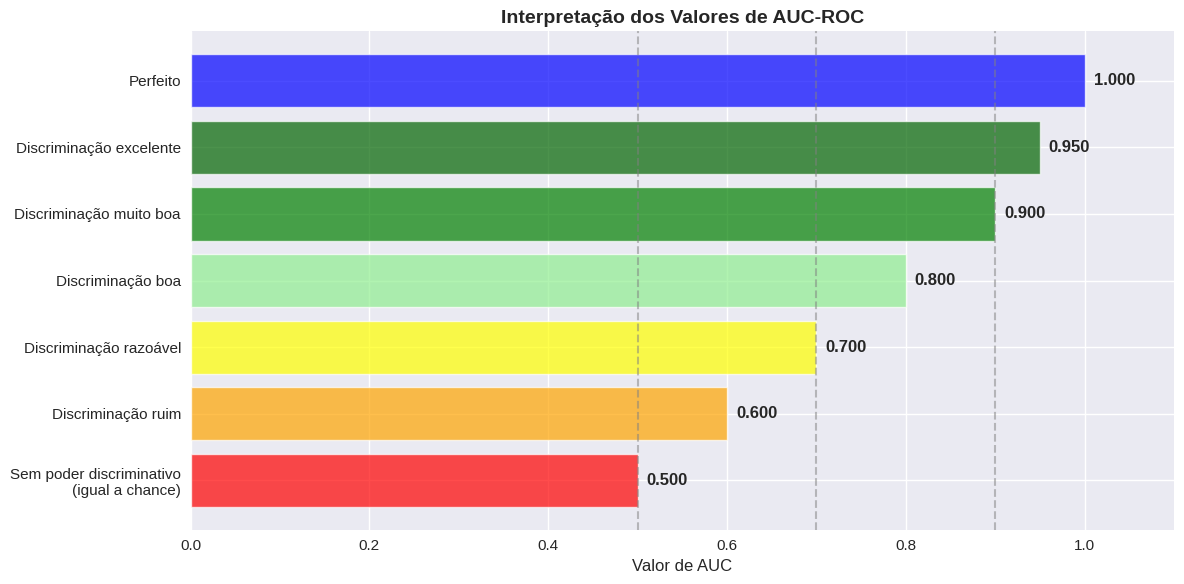

TABELA DE INTERPRETAÇÃO DO AUC-ROC
+----------+-----------------+-------------------------------+------------------------------+
| AUC      | Classificação   | Interpretação Prática         | Recomendação                 |
+==========+=================+===============================+==============================+
| 0.5      | Nenhum poder    | Igual a jogar moeda           | ❌ Modelo inútil             |
+----------+-----------------+-------------------------------+------------------------------+
| 0.5-0.7  | Fraco           | Pouco melhor que aleatório    | ⚠️ Precisa melhorar muito     |
+----------+-----------------+-------------------------------+------------------------------+
| 0.7-0.8  | Aceitável       | Discriminação razoável        | ✅ Pode ser útil com ajustes |
+----------+-----------------+-------------------------------+------------------------------+
| 0.8-0.9  | Bom             | Boa capacidade discriminativa | ✅ Bom para uso              |
+----------+---------------

In [98]:
# Criar visualização da interpretação
auc_values = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0]
interpretations = [
    "Sem poder discriminativo\n(igual a chance)",
    "Discriminação ruim",
    "Discriminação razoável",
    "Discriminação boa",
    "Discriminação muito boa",
    "Discriminação excelente",
    "Perfeito"
]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen', 'blue']

fig, ax = plt.subplots(figsize=(12, 6))

# Barras horizontais
bars = ax.barh(interpretations, auc_values, color=colors, alpha=0.7)

# Adicionar valores
for bar, value in zip(bars, auc_values):
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{value:.3f}', va='center', fontweight='bold')

ax.set_xlabel('Valor de AUC', fontsize=12)
ax.set_title('Interpretação dos Valores de AUC-ROC', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.1)

# Linhas de referência
for x in [0.5, 0.7, 0.9]:
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("="*70)
print("TABELA DE INTERPRETAÇÃO DO AUC-ROC")
print("="*70)

tabela_interpretacao = [
    ["AUC", "Classificação", "Interpretação Prática", "Recomendação"],
    ["0.5", "Nenhum poder", "Igual a jogar moeda", "❌ Modelo inútil"],
    ["0.5-0.7", "Fraco", "Pouco melhor que aleatório", "⚠️ Precisa melhorar muito"],
    ["0.7-0.8", "Aceitável", "Discriminação razoável", "✅ Pode ser útil com ajustes"],
    ["0.8-0.9", "Bom", "Boa capacidade discriminativa", "✅ Bom para uso"],
    ["0.9-0.95", "Muito Bom", "Excelente discriminação", "✅ Muito bom para produção"],
    ["0.95-1.0", "Excelente", "Quase perfeito", "✅ Excelente para produção"]
]

from tabulate import tabulate
print(tabulate(tabela_interpretacao, headers="firstrow", tablefmt="grid"))

EXEMPLO PRÁTICO: DIAGNÓSTICO DE CÂNCER DE MAMA


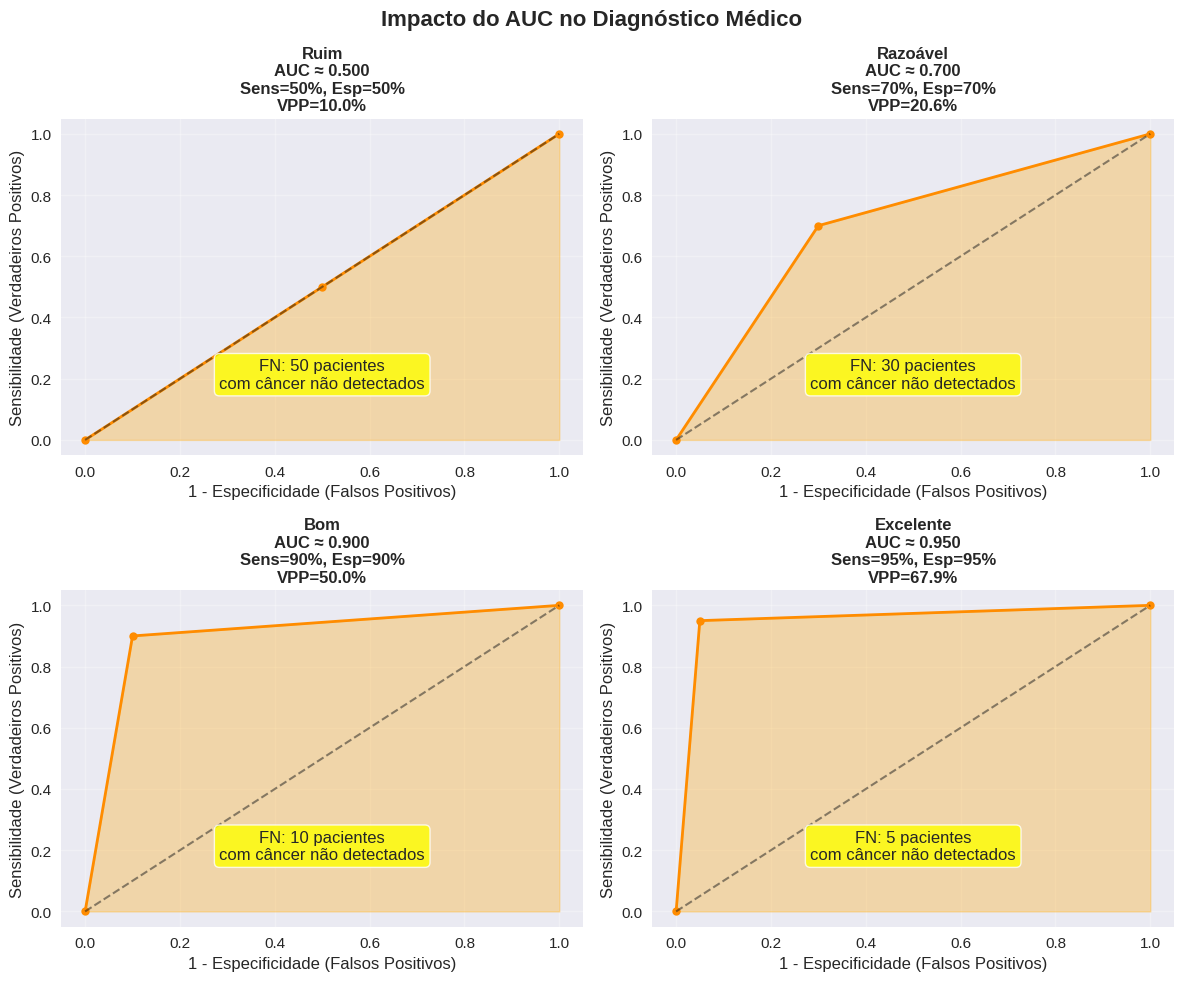


IMPACTO CLÍNICO DE DIFERENTES VALORES DE AUC
+-------+-----------------+------------------------+-----------------+-----------------------------+
|   AUC | Sensibilidade   |       Falsos Negativos | Risco Clínico   | Recomendação                |
|       | Típica          |   (em 1000 pacientes*) |                 |                             |
+=======+=================+========================+=================+=============================+
|  0.5  | 50%             |                     50 | 🚨 MUITO ALTO   | ❌ Inaceitável              |
+-------+-----------------+------------------------+-----------------+-----------------------------+
|  0.7  | 70%             |                     30 | ⚠️ ALTO          | ⚠️ Precisa melhorar          |
+-------+-----------------+------------------------+-----------------+-----------------------------+
|  0.8  | 80%             |                     20 | ⚠️ MODERADO      | ✅ Aceitável com supervisão |
+-------+-----------------+------------------

In [99]:
# Exemplo específico para diagnóstico médico
print("="*70)
print("EXEMPLO PRÁTICO: DIAGNÓSTICO DE CÂNCER DE MAMA")
print("="*70)

# Simular dados médicos
np.random.seed(42)
n_patients = 1000

# Supor 10% com câncer (prevalência típica)
has_cancer = np.random.choice([0, 1], size=n_patients, p=[0.9, 0.1])

# Modelo com diferentes níveis de performance
sensitivities = [0.5, 0.7, 0.9, 0.95]
specificities = [0.5, 0.7, 0.9, 0.95]
model_names = ['Ruim', 'Razoável', 'Bom', 'Excelente']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (sens, spec, name) in enumerate(zip(sensitivities, specificities, model_names)):
    
    # Calcular AUC aproximado (simplificado)
    auc = (sens + spec) / 2
    
    # Pontos para curva ROC simplificada
    fpr = [0, 1-spec, 1]  # FPR = 1 - especificidade
    tpr = [0, sens, 1]    # TPR = sensibilidade
    
    axes[idx].plot(fpr, tpr, 'o-', lw=2, color='darkorange')
    axes[idx].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[idx].fill_between(fpr, tpr, alpha=0.3, color='orange')
    
    # Calcular estatísticas médicas
    # Prevalência 10%
    prevalence = 0.10
    tp = sens * prevalence * n_patients
    fn = (1 - sens) * prevalence * n_patients
    fp = (1 - spec) * (1 - prevalence) * n_patients
    tn = spec * (1 - prevalence) * n_patients
    
    # Valor Preditivo Positivo (VPP)
    vpp = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    axes[idx].set_title(f'{name}\nAUC ≈ {auc:.3f}\nSens={sens:.0%}, Esp={spec:.0%}\nVPP={vpp:.1%}', 
                       fontweight='bold')
    axes[idx].set_xlabel('1 - Especificidade (Falsos Positivos)')
    axes[idx].set_ylabel('Sensibilidade (Verdadeiros Positivos)')
    axes[idx].grid(True, alpha=0.3)
    
    # Anotar impacto médico
    axes[idx].text(0.5, 0.2, f'FN: {fn:.0f} pacientes\ncom câncer não detectados',
                  transform=axes[idx].transAxes, ha='center',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.suptitle('Impacto do AUC no Diagnóstico Médico', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tabela de impacto clínico
print("\n" + "="*70)
print("IMPACTO CLÍNICO DE DIFERENTES VALORES DE AUC")
print("="*70)

impacto_clinico = [
    ["AUC", "Sensibilidade\nTípica", "Falsos Negativos\n(em 1000 pacientes*)", "Risco Clínico", "Recomendação"],
    ["0.5", "50%", "50", "🚨 MUITO ALTO", "❌ Inaceitável"],
    ["0.7", "70%", "30", "⚠️ ALTO", "⚠️ Precisa melhorar"],
    ["0.8", "80%", "20", "⚠️ MODERADO", "✅ Aceitável com supervisão"],
    ["0.9", "90%", "10", "✅ BAIXO", "✅ Bom para uso auxiliar"],
    ["0.95", "95%", "5", "✅ MUITO BAIXO", "✅ Excelente para uso"],
    ["0.99", "99%", "1", "✅ MÍNIMO", "✅ Ideal para produção"]
]

print(tabulate(impacto_clinico, headers="firstrow", tablefmt="grid"))
print("\n* Assumindo prevalência de 10% (100 pacientes com câncer em 1000 exames)")

In [100]:
print("="*70)
print("VANTAGENS E LIMITAÇÕES DO AUC-ROC")
print("="*70)

comparacao = [
    ["Aspecto", "Vantagens ✅", "Limitações ❌"],
    ["Desbalanceamento", "Robusto a classes desbalanceadas", "Pode mascarar performance ruim na classe minoritária"],
    ["Threshold", "Independente do ponto de corte escolhido", "Não informa qual threshold usar na prática"],
    ["Comparação", "Permite comparar modelos facilmente", "Não considera custos diferentes de erros"],
    ["Interpretação", "Fácil de entender (0.5 a 1.0)", "Pode ser enganoso em certos contextos"],
    ["Distribuição", "Considera toda a distribuição de probabilidades", "Sensível à calibração das probabilidades"],
    ["Aplicação", "Excelente para seleção de modelos", "Não é a métrica final para deploy"]
]

print(tabulate(comparacao, headers="firstrow", tablefmt="grid"))

print("\n" + "="*70)
print("QUANDO USAR AUC-ROC vs OUTRAS MÉTRICAS")
print("="*70)

quando_usar = [
    ["Situação", "Métrica Preferida", "Por quê?"],
    ["Seleção inicial de modelos", "AUC-ROC", "Comparação justa independente do threshold"],
    ["Otimização para produção", "F1-Score ou Recall", "Considera o threshold específico que será usado"],
    ["Custos assimétricos de erro", "Matriz de Confusão + custos", "Falsos positivos ≠ falsos negativos"],
    ["Classes muito desbalanceadas", "Precision-Recall AUC", "Mais informativo para classe minoritária"],
    ["Threshold fixo definido", "Accuracy/Precision/Recall", "Performance no ponto operacional real"]
]

print(tabulate(quando_usar, headers="firstrow", tablefmt="grid"))

VANTAGENS E LIMITAÇÕES DO AUC-ROC
+------------------+-------------------------------------------------+------------------------------------------------------+
| Aspecto          | Vantagens ✅                                    | Limitações ❌                                        |
+==================+=================================================+======================================================+
| Desbalanceamento | Robusto a classes desbalanceadas                | Pode mascarar performance ruim na classe minoritária |
+------------------+-------------------------------------------------+------------------------------------------------------+
| Threshold        | Independente do ponto de corte escolhido        | Não informa qual threshold usar na prática           |
+------------------+-------------------------------------------------+------------------------------------------------------+
| Comparação       | Permite comparar modelos facilmente             | Não considera c